# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

1. **¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?**
<br>
Los datos que ayudarían a predecir el precio son:
- **Superficie construida:** Es una característica de la propiedad que da una idea general que tan grande es e influyente en el precio.
- **Número de cuartos y baños:** Es una característica de la propiedad que puede indicar cuantas personas pueden vivir allí.
- **Número de garajes:** Suma valor, e indica si se pueden guardar carros o motos en la propiedad.
- **Estado de la propiedad (Arreglada y sin fallos?) y antigüedad:** Dependiendo si es una propiedad nueva o antigua, puede indicar si es necesario realizarle arreglos o embellecimiento a la propiedad. Y el precio puede cambiar.
- **Tipo de vivienda(horizontal o vertical):** Indicativo que da valor al tipo de vivienda.
- **Distancia a Transporte público(metros):** Una medida cuantitativa que de un acercamiento a cuanto tardaría una persona en utilizar transporte público.
- **Distancia a Comercio(metros):** Una medida cuantitativa que permita conocer si puede adquirir bienes o servicios esenciales de un hogar.
- **Ubicación:** Un dato que permitiría estratificar y valorizar por zona la propiedad de acuerdo a datos gubernamentales de una ciudad.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importación de las librerías necesarias para el EDA

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv") #Es necesario tener el csv en la misma carpeta del proyecto.
print(f"El dataset proporcionado por Properati tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
df.head(5)

El dataset proporcionado por Properati tiene 146660 filas y 19 columnas.



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lat,136735.0,-34.604896,0.468428,-35.318457,-34.627667,-34.600943,-34.574600,8.505113e+01
lon,136701.0,-58.465304,0.486190,-180.000000,-58.504012,-58.443262,-58.407586,-5.780583e+01
rooms,146660.0,3.079817,1.416352,1.000000,2.000000,3.000000,4.000000,3.500000e+01
bedrooms,146660.0,1.983240,1.151304,0.000000,1.000000,2.000000,3.000000,1.500000e+01
bathrooms,140703.0,1.599994,0.889324,1.000000,1.000000,1.000000,2.000000,1.400000e+01
surface_total,126133.0,216.872888,2037.606649,10.000000,52.000000,78.000000,140.000000,1.935490e+05
surface_covered,125046.0,112.818011,916.857584,1.000000,47.000000,68.000000,108.000000,1.260620e+05
price,146660.0,241221.080199,318519.461370,5500.000000,111000.000000,166000.000000,265000.000000,3.243423e+07


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [5]:
for column in df.columns:
    faltante = df.shape[0] - df[column].isnull().value_counts()[0]
    print("la columna \033[1m{0:15}\033[0m: {1} datos faltantes".format(column, faltante))

la columna start_date     : 0 datos faltantes
la columna end_date       : 0 datos faltantes
la columna created_on     : 0 datos faltantes
la columna lat            : 9925 datos faltantes
la columna lon            : 9959 datos faltantes
la columna l1             : 0 datos faltantes
la columna l2             : 0 datos faltantes
la columna l3             : 0 datos faltantes
la columna rooms          : 0 datos faltantes
la columna bedrooms       : 0 datos faltantes
la columna bathrooms      : 5957 datos faltantes
la columna surface_total  : 20527 datos faltantes
la columna surface_covered: 21614 datos faltantes
la columna price          : 0 datos faltantes
la columna currency       : 0 datos faltantes
la columna title          : 0 datos faltantes
la columna description    : 0 datos faltantes
la columna property_type  : 0 datos faltantes
la columna operation_type : 0 datos faltantes


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

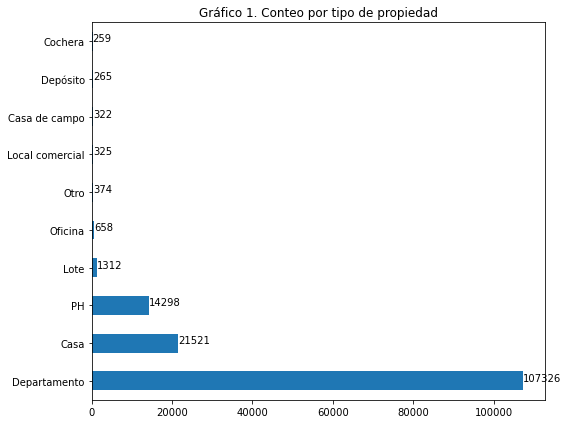

In [6]:
conteo_por_propiedad = df.property_type.value_counts()
fig = plt.figure(figsize=(8,6))

barras = conteo_por_propiedad.plot(kind='barh')
for indice, conteo in enumerate(conteo_por_propiedad): 
    plt.text(conteo, indice, str(conteo)) 
plt.title('Gráfico 1. Conteo por tipo de propiedad')

plt.tight_layout()

#plt.savefig('grafico_1.png', bbox_inches='tight')
plt.show()

In [7]:
(df.property_type.count() - sum(df.property_type.isin(['Departamento','Casa','PH'])))/df.property_type.count() * 100 #Proporción de las propiedades con menos de 10mil publicaciones.

2.3966998499931815

Podemos ver en el Gráfico 1 que hay 10 tipos de propiedad. Los tres tipos de propiedad que representan más del 95% de las publicaciones son: Departamento, Casa y PH

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

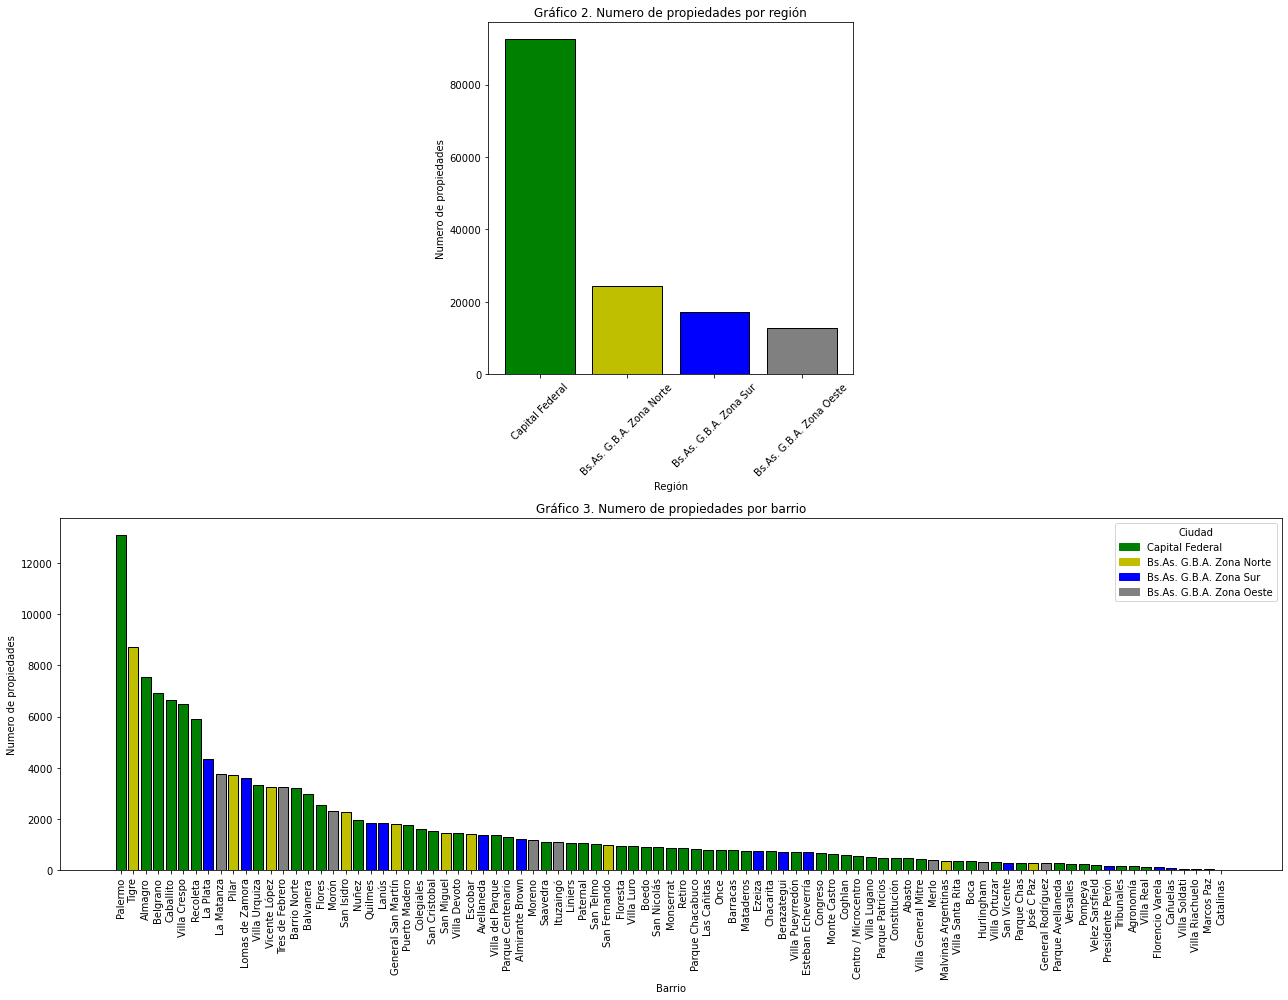

In [8]:
fig = plt.figure(figsize =(18, 14))
gs = fig.add_gridspec(2, 3)

colors = {'Capital Federal':'g', 'Bs.As. G.B.A. Zona Norte':'y', 'Bs.As. G.B.A. Zona Sur':'b', 'Bs.As. G.B.A. Zona Oeste':'gray'} # diccionario para etiquetar por color cada ciudad visualmente en el gráfico. 

conteo_por_region = df.l2.value_counts() # Datos correspendientes al gráfico 2 que responde al numero de publicaciones que se han realizado por región
conteo_por_barrio = df.l3.value_counts() # Datos correspendientes al gráfico 3 que responde al numero de publicaciones que se han realizado por barrio

ax1 = fig.add_subplot(gs[0, 1])
x_values2 = range(len(conteo_por_region))
y_values2 = conteo_por_region 
plt.bar(x_values2, y_values2, color = colors.values(), edgecolor='black')
ax1.set_xticks(range(len(conteo_por_region)))
ax1.set_xticklabels(conteo_por_region.keys(), rotation = 45)
plt.xlabel('Región')
plt.ylabel('Numero de propiedades')
ax1.set_title('Gráfico 2. Numero de propiedades por región')

ax2 = fig.add_subplot(gs[1, 0:])
x_values1 = list(range(len(conteo_por_barrio)))
y_values1 = conteo_por_barrio

barrios_por_region = df.groupby(['l2', 'l3'])['l1'].count() # Conteo de publicaciones por agrupación de las columnas 'l3'(Barrios) por cada ciudad

#Etiquetar  cada barrio por el color correspondientemente a la ciudad-region que pertenece
colors_hue = []
for barrio in conteo_por_barrio.keys():
    for region, color in colors.items():
        if barrio in barrios_por_region[region]:
            colors_hue.append(color)

plt.bar(x_values1, y_values1, color = colors_hue, edgecolor='black')
ax2.set_xticks(range(len(conteo_por_barrio))) # Configurar la localización de las etiquetas del eje X
ax2.set_xticklabels(conteo_por_barrio.keys(), rotation = 90)
plt.xlabel('Barrio')
plt.ylabel('Numero de propiedades')
ax2.set_title('Gráfico 3. Numero de propiedades por barrio')

#Configuracion del cuadro de leyenda, por región
labels = conteo_por_region.keys() # Array que tiene los nombres de las ciudades
rectangles = [plt.Rectangle((0,0),1,1, color=colors[l]) for l in labels] # Lista de rectangulos con el color correspondiente por ciudad
plt.legend(rectangles, labels, title="Ciudad") # Leyenda que visualiza el color asignado por Ciudad.

plt.tight_layout()

#plt.savefig('grafico_2_3.png', bbox_inches='tight')
plt.show()

A partir de los 2 gráficos anteriores se puede observar que la mayoría de publicaciones de propiedades se encuentran en la capital federal y 4 barrios dentro de ella cuentan con más de 5000 publicaciones cada barrio.

5. **Filtrando el Dataset:** 
A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [9]:
#df_3 = df.property_type.isin(['Departamento','Casa','PH']).copy()

df_cf = df[(df.l2 == 'Capital Federal') & (df.property_type.isin(['Departamento','Casa','PH']))].copy()
df_cf.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [10]:
#Obtención de estadísticos para ver una primera aproximación de estas variables.
df_cf[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rooms,91485.0,2.964278,1.314704,1.0,2.0,3.0,4.0,26.0
bedrooms,91485.0,1.960278,1.072946,0.0,1.0,2.0,3.0,15.0
bathrooms,89314.0,1.560147,0.860309,1.0,1.0,1.0,2.0,14.0
surface_total,82568.0,112.626369,980.713664,10.0,49.0,71.0,111.0,126062.0
surface_covered,82250.0,94.966310,778.515243,1.0,44.0,63.0,96.0,126062.0
price,91485.0,259500.258239,322265.440799,6000.0,120000.0,175000.0,279000.0,32434232.0


De los valores estadisticos podemos observar que:
 - El valor máximo que esta tomando surface_total y surface_covered son mayores a 100 mil metros cuadrados algo que no es posible en terminos de una propiedad como una casa, apartamento o PH. Ademas de que el tercer cuartil esta muy alejado a esos outliers.
 - Hay valores que son menores a 18 metros cuadrados (superficie minima según codigo de edificación de Argentina de un departamento).
 - El valor máximo y mínimo del precio se encuentran en escalas de magnitud diferentes con respecto a las medidas de tendencia central. (Esta columna será filtrada si después de haber filtrado por superficie, su comportamiento continúa)

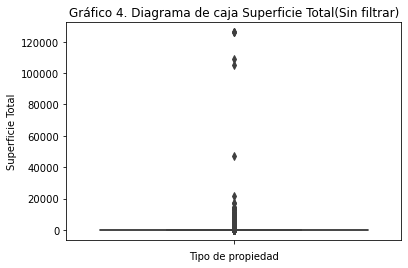

In [11]:
#Distribucion de la variable surface_total
sns.boxplot(data = df_cf, y = 'surface_total')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Superficie Total')
plt.title('Gráfico 4. Diagrama de caja Superficie Total(Sin filtrar)')
plt.show()

Por medio de los percentiles tomaremos el 90% de los datos correspondientes a los percentiles 5 y 95. Lo cual nos permitira seleccionar datos que nos permita comprender la distribución de los datos.

In [12]:
per95 = df_cf['surface_total'].quantile(0.95)

In [13]:
per5 = df_cf['surface_total'].quantile(0.05)

Aplicamos los filtros correspondientes, para tener una mejor visualización y eliminar el ruido que generaban dichos outliers.

In [14]:
df_filtro1 = df_cf[(df_cf.surface_total > per5) & (df_cf.surface_total < per95)].copy()
df_filtro1.shape

(74062, 19)

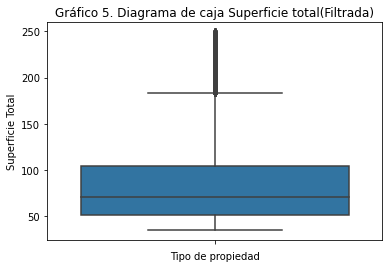

In [15]:
sns.boxplot(data = df_filtro1, y = 'surface_total')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Superficie Total')
plt.title('Gráfico 5. Diagrama de caja Superficie total(Filtrada)')
#plt.savefig('grafico_5.png', bbox_inches='tight')
plt.show()

Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Por tanto lo filtraremos.

In [16]:
#Cuantas publicaciones tienen una surface_covered mayor a surface_total
sum(df_filtro1.surface_total < df_filtro1.surface_covered)

590

In [17]:
df_filtro2 = df_filtro1[df_filtro1.surface_total >= df_filtro1.surface_covered].copy()
df_filtro2.shape

(73011, 19)

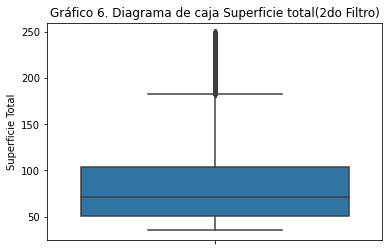

In [18]:
sns.boxplot(data = df_filtro2, y = 'surface_total')
#plt.xlabel('Tipo de propiedad')
plt.ylabel('Superficie Total')
plt.title('Gráfico 6. Diagrama de caja Superficie total(2do Filtro)')
#plt.savefig('grafico_6.png', bbox_inches='tight')
plt.show()

No hay una diferencia perceptible entre las gráficas 5 y 6 al quitar los 590 publicaciones correspondientes a una superficie cubierta mayor a la total.

In [19]:
df_filtro2.drop(labels = ['lat', 'lon'], axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rooms,73011.0,2.960061,1.095880,1.0,2.0,3.0,4.0,21.0
bedrooms,73011.0,1.960540,0.940114,0.0,1.0,2.0,3.0,15.0
bathrooms,72288.0,1.506350,0.762001,1.0,1.0,1.0,2.0,14.0
surface_total,73011.0,85.253428,45.464299,35.0,51.0,71.0,104.0,249.0
surface_covered,73011.0,75.011190,39.472077,1.0,46.0,63.0,91.0,249.0
price,73011.0,236287.280752,223645.809637,6000.0,129900.0,180000.0,270000.0,32434232.0


Podemos corroborar que el comportamiento del Precio continua con un minimo y un maximo que no representan valores representativos a la muestra, por lo cual los eliminaremos.

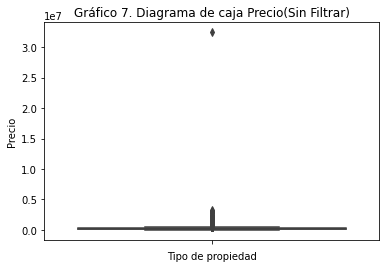

In [20]:
sns.boxplot(data = df_filtro2, y = 'price')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio')
plt.title('Gráfico 7. Diagrama de caja Precio(Sin Filtrar)')
plt.show()

De acuerdo a la gráfica 7 los outliers de la variable precio no nos permiten visualizar correctamente una distribución clara. Por lo cual tomaremos el 90% de los datos correspondientes a los percentiles 5 y 95, donde nos permitira seleccionar datos para comprender la distribución de los datos.

In [21]:
percentil95 = df_filtro2['price'].quantile(0.95)
percentil95

574999.0

In [22]:
percentil5 = df_filtro2['price'].quantile(0.05)
percentil5

88000.0

In [23]:
df_f3 = df_filtro2[(df_filtro2.price > percentil5) & (df_filtro2.price < percentil95)].copy()
df_f3.shape

(65670, 19)

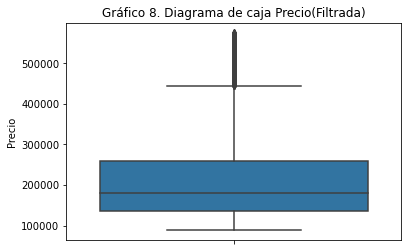

In [24]:
sns.boxplot(data = df_f3, y = 'price')
#plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio')
plt.title('Gráfico 8. Diagrama de caja Precio(Filtrada)')
#plt.savefig('grafico_8.png', bbox_inches='tight')
plt.show()

Al filtrar el precio vemos que los datos se concentran en un precio promedio de ~ 190.000

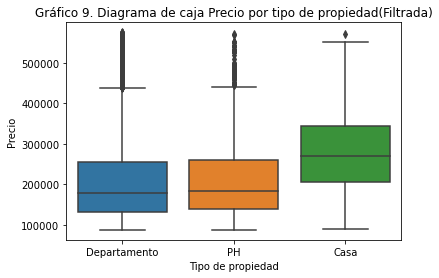

In [25]:
sns.boxplot(data = df_f3, y = 'price', x='property_type')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio')
plt.title('Gráfico 9. Diagrama de caja Precio por tipo de propiedad(Filtrada)')
#plt.savefig('grafico_801.png', bbox_inches='tight')
plt.show()

En este diagrama podemos notar que las casas tienden a ser más costosas que los departamentos y los PH

In [26]:
df_f3.drop(labels = ['lat', 'lon'], axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rooms,65670.0,2.945820,1.061791,1.0,2.0,3.0,4.0,21.0
bedrooms,65670.0,1.950845,0.922984,0.0,1.0,2.0,3.0,15.0
bathrooms,65058.0,1.452980,0.680501,1.0,1.0,1.0,2.0,14.0
surface_total,65670.0,82.439166,40.488641,35.0,52.0,71.0,100.0,249.0
surface_covered,65670.0,71.988929,33.651860,1.0,47.0,63.0,87.0,249.0
price,65670.0,209737.168601,100606.651130,88021.0,135000.0,180000.0,259000.0,574997.0


**Nota:** Otro filtro útil para este caso es respecto al numero máximo de rooms(habitaciones), bedrooms(dormitorios) y bathrooms(baños). En donde se puede observar un numero máximo fuera de lo común para las propiedades que no tienen suficiente superficie total o el tipo de propiedad no se ajusta a ese numero máximo de habitaciones o baños. (Pero esto es un supuesto, que tanto puede mejorar la calidad de datos. Siento que puede sesgar para una etapa posterior)

<Figure size 432x288 with 0 Axes>

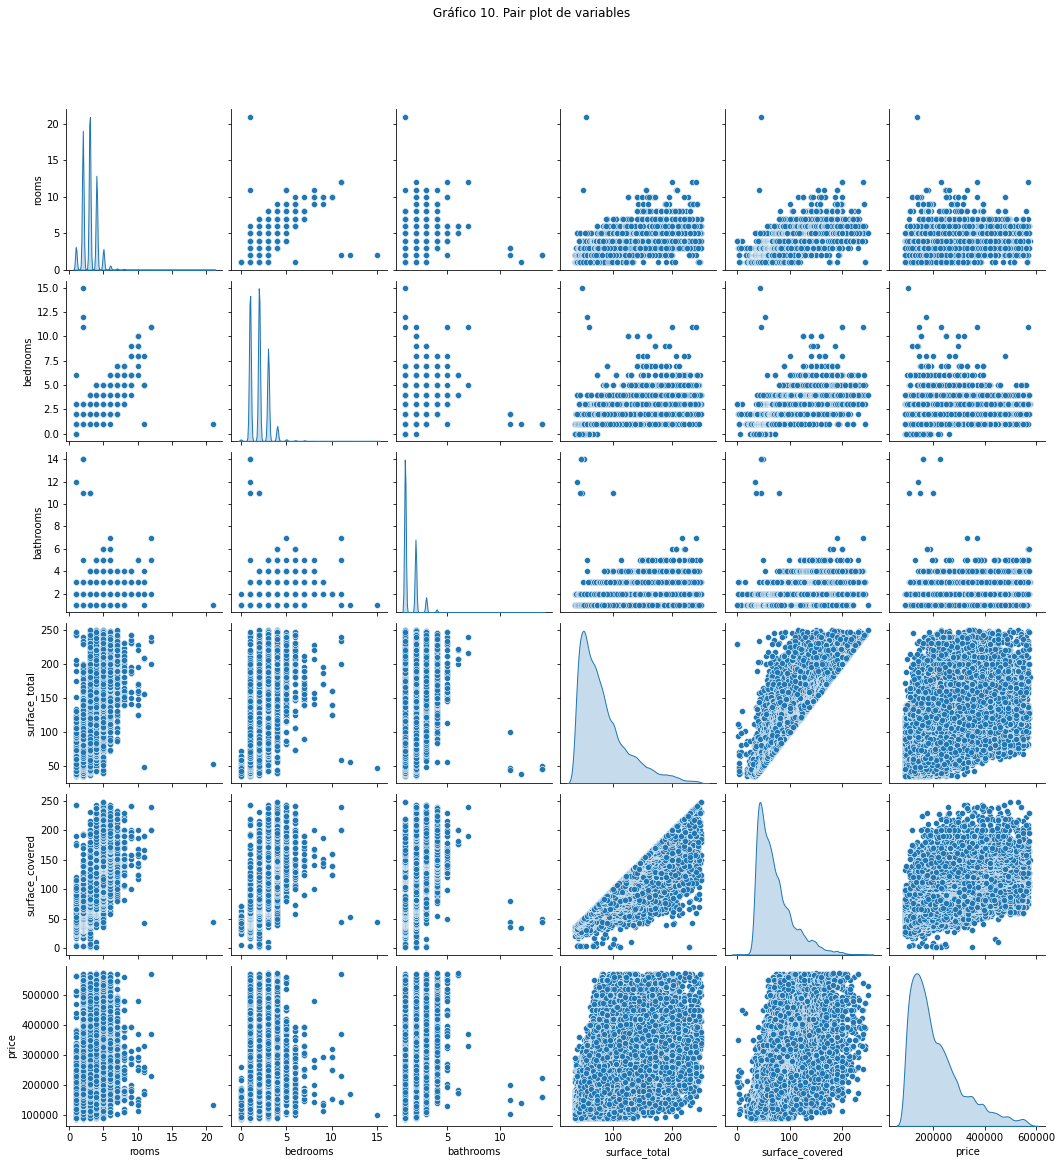

In [27]:
fig = plt.figure()
g = sns.pairplot(df_f3.drop(labels = ['lat', 'lon'], axis=1), diag_kind = 'kde')
g.fig.suptitle("Gráfico 10. Pair plot de variables", y=1.08)
#plt.title('Gráfico 10. Pair plot de variables')

#plt.savefig('grafico_9.png', bbox_inches='tight')
plt.show()

Del pairplot no se puede ver u observar una clara tendencia del precio con respecto a cada variable, por tanto veremos en las siguientes gráficas la distribución de estos datos.

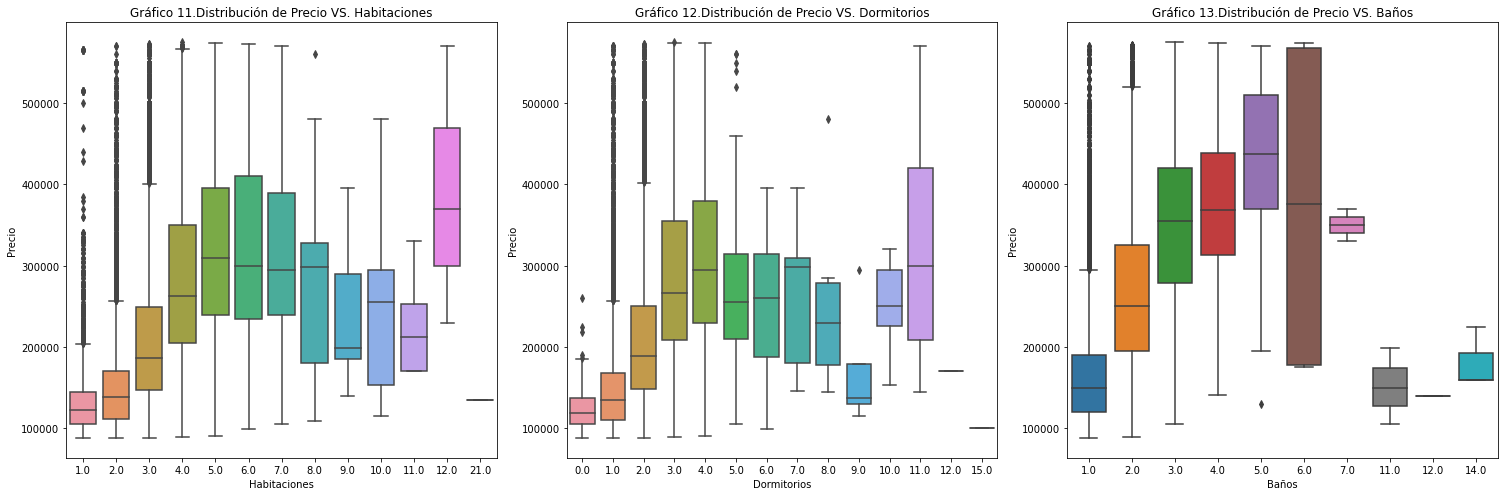

In [28]:
plt.figure(figsize=(21,7))
features_to_plot = {'rooms':'Habitaciones', 'bedrooms': 'Dormitorios', 'bathrooms': 'Baños'}
for i, feature in enumerate(features_to_plot.keys()):
    plt.subplot(1,3,i+1)
    sns.boxplot(x = feature, y='price', data = df_f3)
    title_string = "Gráfico " + str(11+i) + ".Distribución de Precio VS. " + features_to_plot[feature]
    plt.xlabel(features_to_plot[feature])
    plt.ylabel("Precio")
    plt.title(title_string)
    
plt.tight_layout()

#plt.savefig('grafico_1012.png', bbox_inches='tight')
plt.show()

Las gráficas 11, 12 y 13 es otra manera de visualizar las 3 primeras gráficas de la ultima fila del pairplot(Gráfica 10.) en donde no vemos una tendencia lineal de acuerdo a cada variable, pero quizas si pensamos en terminos de funciones polinomicas podriamos ajustar una de estas funciones para predecir el precio en funcion de las habitaciones, dormitorios o baños. Pero lo comun a encontrar en el mercado inmobiliario es que a mayor numero de habitaciones, dormitorios o baños el precio de la propiedad deberia ser mayor y si analizamos esos puntos (>= 9 habitaciones, dormitorios o baños) quizas los encontremos como outliers en cada distribución.

In [29]:
df_final = df_f3.drop(labels = ['lat', 'lon', 'start_date', 'end_date', 'created_on', 'l1', 'l2', 'l3', 'currency', 'title', 'operation_type'], axis = 1)
df_final = df_final.dropna(axis=0)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65058 entries, 0 to 146557
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            65058 non-null  float64
 1   bedrooms         65058 non-null  float64
 2   bathrooms        65058 non-null  float64
 3   surface_total    65058 non-null  float64
 4   surface_covered  65058 non-null  float64
 5   price            65058 non-null  float64
 6   description      65058 non-null  object 
 7   property_type    65058 non-null  object 
dtypes: float64(6), object(2)
memory usage: 4.5+ MB


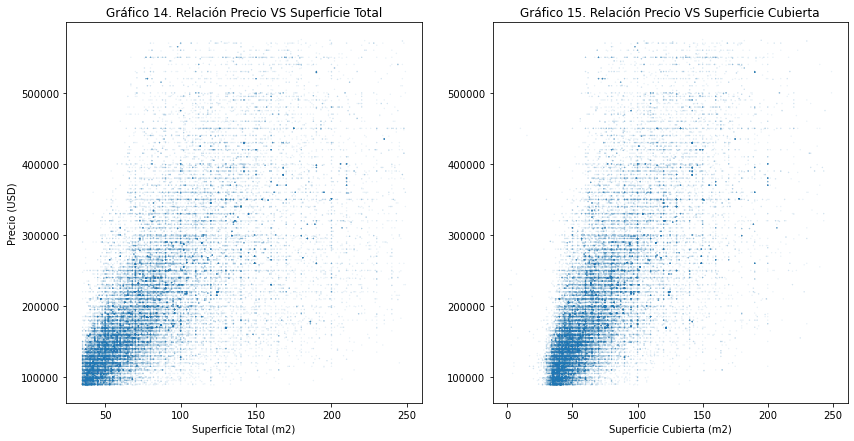

In [30]:
fig = plt.figure(figsize =(14, 7))
ax1 = fig.add_subplot(121)
ax1.scatter(df_final.surface_total, df_final.price, alpha=0.1, s=2, edgecolor='none')
plt.ylabel('Precio (USD)')
plt.xlabel('Superficie Total (m2)')
ax1.set_title('Gráfico 14. Relación Precio VS Superficie Total')

ax2 = fig.add_subplot(122)
ax2.scatter(df_final.surface_covered, df_final.price, alpha=0.1, s=2, edgecolor='none')
#plt.ylabel('Precio (USD)')
plt.xlabel('Superficie Cubierta (m2)')
ax2.set_title('Gráfico 15. Relación Precio VS Superficie Cubierta')

#plt.savefig('grafico_1415.png', bbox_inches='tight')
plt.show()

Las gráficas 14 y 15 es otra manera de visualizar las gráficas 4 y 5 de la ultima fila del pairplot(Gráfica 10.) y podemos observar que existe una correlación lineal o zonal cuando la superficie cubierta o total y el precio son bajos (>100 m^2, >250.000(USD) respectivamente).

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [31]:
correlacion = df_final.corr()
correlacion

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.935785,0.508052,0.728175,0.781909,0.522680
bedrooms,0.935785,1.000000,0.510575,0.711569,0.768791,0.505370
bathrooms,0.508052,0.510575,1.000000,0.573494,0.613339,0.600663
surface_total,0.728175,0.711569,0.573494,1.000000,0.913829,0.687769
surface_covered,0.781909,0.768791,0.613339,0.913829,1.000000,0.716567
price,0.522680,0.505370,0.600663,0.687769,0.716567,1.000000


In [32]:
xyticks = ['Habitaciones', 'Dormitorios', 'Baños', 'Superficie Total', 'Superficie Cubierta', 'Precio']

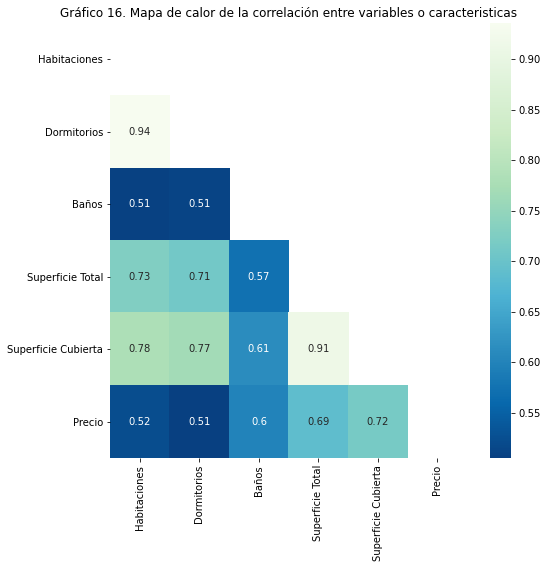

In [33]:
plt.figure(figsize=(8,8))
mascara = np.zeros_like(correlacion)
mascara[np.triu_indices_from(mascara)] = True #aplicación de una mascara para no visualizar la diagonal hacia arriba
sns.heatmap(correlacion, annot=True, cmap="GnBu_r", mask=mascara, xticklabels= xyticks,  yticklabels= xyticks)
plt.title("Gráfico 16. Mapa de calor de la correlación entre variables o caracteristicas")

#plt.savefig('grafico_13.png', bbox_inches='tight')
plt.show()

De acuerdo al mapa de calor las mejores variables para predecir el precio son: 'surface_covered','surface_covered' con un coeficiente mayor de 0.65 <br>

In [34]:
df_departamento = df_final[df_final.property_type=='Departamento']
corr_depa = df_departamento.corr()
df_casa = df_final[df_final.property_type=='Casa']
corr_casa = df_casa.corr()
df_ph = df_final[df_final.property_type=='PH']
corr_ph = df_ph.corr()

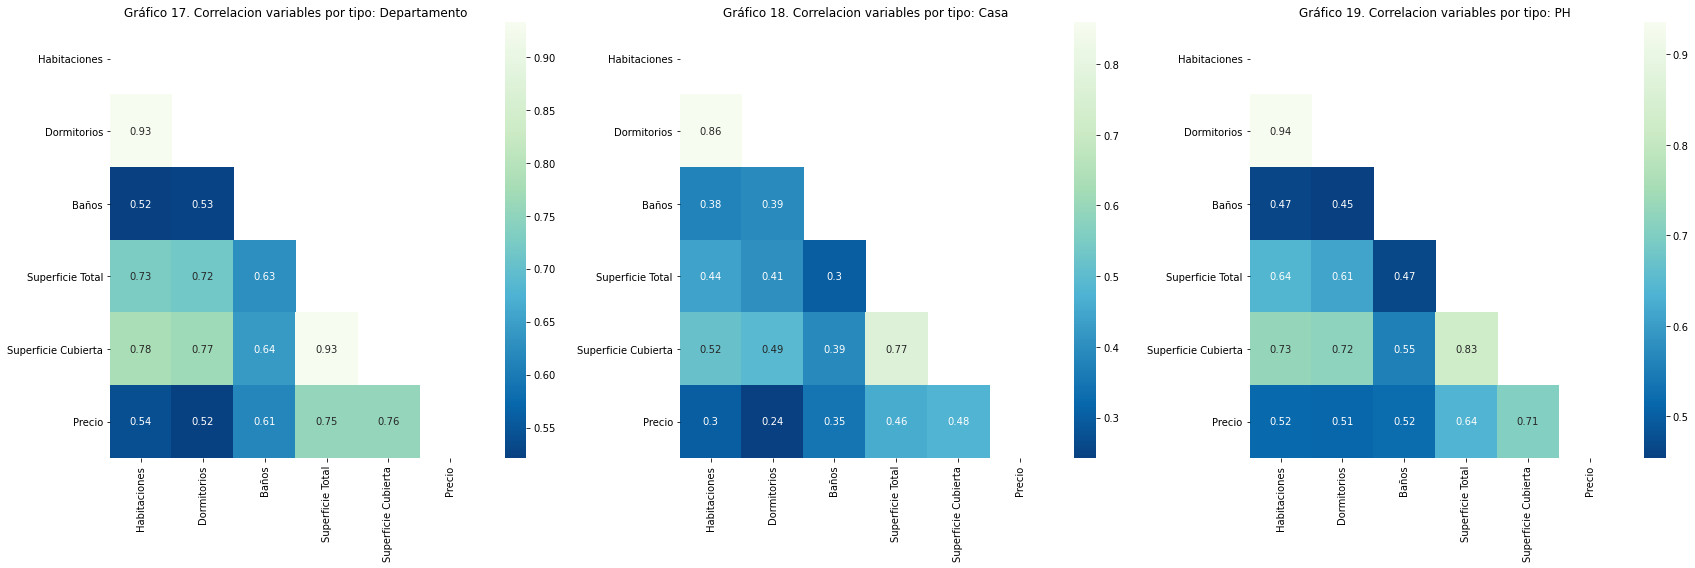

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
sns.heatmap(corr_depa,annot=True, cmap="GnBu_r", mask=mascara, ax = ax1, xticklabels= xyticks,  yticklabels= xyticks)
ax1.set_title('Gráfico 17. Correlacion variables por tipo: Departamento')

sns.heatmap(corr_casa,annot=True, cmap="GnBu_r", mask=mascara, ax = ax2, xticklabels= xyticks,  yticklabels= xyticks)
ax2.set_title('Gráfico 18. Correlacion variables por tipo: Casa')

sns.heatmap(corr_ph,annot=True, cmap="GnBu_r", mask=mascara, ax = ax3, xticklabels= xyticks,  yticklabels= xyticks)
ax3.set_title('Gráfico 19. Correlacion variables por tipo: PH')

plt.tight_layout()
#plt.savefig('grafico_1618.png', bbox_inches='tight')
plt.show()

En las gráficas 17, 18 y 19 se buscaba ver como se correlacionaba el tipo de propiedad con cada una de las variables. Y se puede apreciar que para Deparatmentos y PH siguen teniendo una bueno correlación con los datos, para el tipo Casa estas correlaciones son menores y disminuyen si tenemos en cuenta los valores correspondientes a los datos globales. Lo cual tiene sentido si tenemos en cuenta que las propiedades más costosas y con más superficie de acuerdo a las gráficas 14 y 15 tienden a perder la correlación lineal. A continuación la visualizaremos.

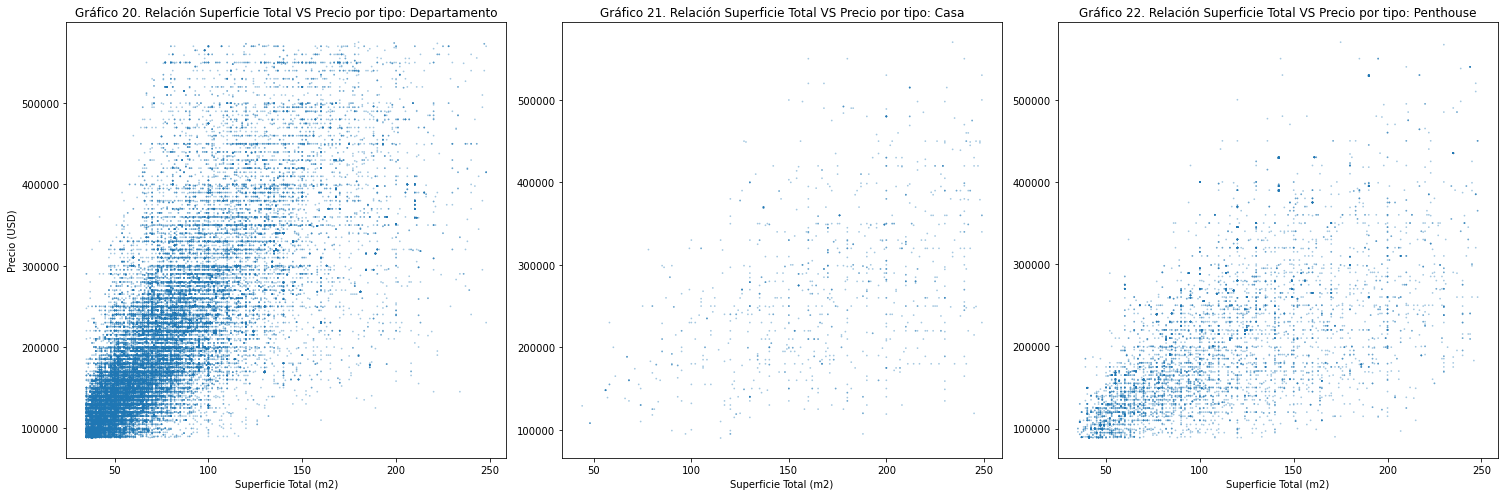

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

ax1.scatter(df_departamento.surface_total, df_departamento.price, alpha=0.4, s=3, edgecolor='none')
ax1.set_ylabel('Precio (USD)')
ax1.set_xlabel('Superficie Total (m2)')
ax1.set_title('Gráfico 20. Relación Superficie Total VS Precio por tipo: Departamento')

ax2.scatter(df_casa.surface_total, df_casa.price, alpha=0.4, s=3, edgecolor='none')
ax2.set_xlabel('Superficie Total (m2)')
#ax2.set_ylabel('Precio (USD)')
ax2.set_title('Gráfico 21. Relación Superficie Total VS Precio por tipo: Casa')

ax3.scatter(df_ph.surface_total, df_ph.price, alpha=0.4, s=3, edgecolor='none')
ax3.set_xlabel('Superficie Total (m2)')
#ax3.set_ylabel('Precio (USD)')
ax3.set_title('Gráfico 22. Relación Superficie Total VS Precio por tipo: Penthouse')

plt.tight_layout()
#plt.savefig('grafico_1921.png', bbox_inches='tight')
plt.show()

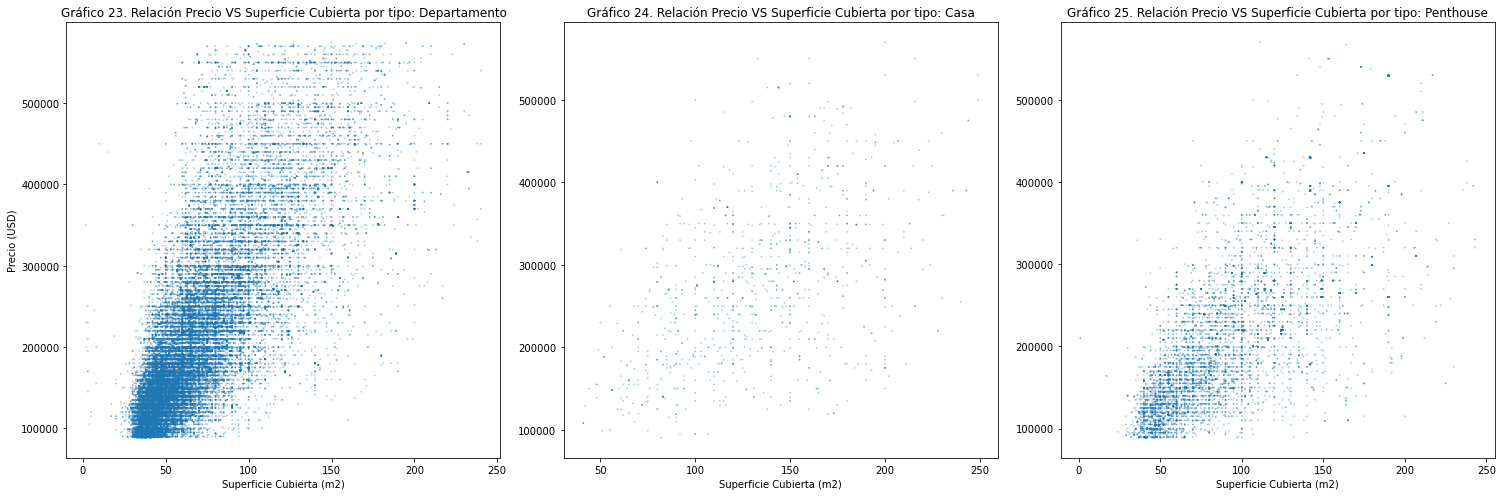

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

ax1.scatter(df_departamento.surface_covered, df_departamento.price, alpha=0.4, s=3, edgecolor='none')
ax1.set_ylabel('Precio (USD)')
ax1.set_xlabel('Superficie Cubierta (m2)')
ax1.set_title('Gráfico 23. Relación Precio VS Superficie Cubierta por tipo: Departamento')

ax2.scatter(df_casa.surface_covered, df_casa.price, alpha=0.4, s=3, edgecolor='none')
#plt.ylabel('Precio (USD)')
ax2.set_xlabel('Superficie Cubierta (m2)')
ax2.set_title('Gráfico 24. Relación Precio VS Superficie Cubierta por tipo: Casa')

ax3.scatter(df_ph.surface_covered, df_ph.price, alpha=0.4, s=3, edgecolor='none')
#plt.ylabel('Precio (USD)')
ax3.set_xlabel('Superficie Cubierta (m2)')
ax3.set_title('Gráfico 25. Relación Precio VS Superficie Cubierta por tipo: Penthouse')

plt.tight_layout()
#plt.savefig('grafico_2224.png', bbox_inches='tight')
plt.show()

Si analizamos la relación de precio con las demás variables, se puede observar una mejor relación de superficie total (surface_total) y superficie cubierta (surface_coverted) para los datos por tipo de propiedad Departamento, en las gráficas 20 y 23 se puede observar su correlación a valores de superficie total menores a ~110$m^2$. <br>

Para el tipo de casa se evidencia que esas relaciones decrece significativamente, en los gráficos 21 y 24 se puede observar que no hay una correlación clara entre los datos. <br>

Con el tipo de propiedad PH se mantiene un poco la relación de variables y en los gráficos 22 y 25 se puede apreciar, similar a lo que sucede con departamentos. <br>

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


### *¿Cuanto tiempo se requiere para vender una propiedad en la plataforma?*



De acuerdo a la pregunta que planteo, se puede considerar que los resultados a obtener seran generalizados debido a que tendría que haber una columna donde se especifique si la venta de la propiedad fue lograda gracias a la publicación en properati. Pero quedará la duda si la fecha final de retiro de la publicación es debida por otro canal de venta o una decisión del propietario de no vender, para solucionar este inconveniente sería necesario realizar una pregunta al usuario: "¿Cuál es la razón/motivo por el que retira la publicación de properati?" y que esta información se vea reflejada en una columna como "estado de la propiedad" con categorías de: vendida en properati, vendida en otra plataforma online(se podría preguntar ¿cuál? y ver la asertividad de la competencia), vendida tradicionalmente(voz a voz) o quizás propietario ya no quiere venderla.

In [38]:
df_desa = df.copy()

df_desafio = df_desa[["start_date", "end_date", "l2", "l3", "price", "property_type"]].copy()
df_desafio.describe(include="all")

,start_date,end_date,l2,l3,price,property_type
count,146660,146660,146660,146660,1.466600e+05,146660
unique,366,412,4,89,NaN,10
top,2019-07-31,9999-12-31,Capital Federal,Palermo,NaN,Departamento
freq,11022,25101,92539,13073,NaN,107326
mean,NaN,NaN,NaN,NaN,2.412211e+05,NaN
std,NaN,NaN,NaN,NaN,3.185195e+05,NaN
min,NaN,NaN,NaN,NaN,5.500000e+03,NaN
25%,NaN,NaN,NaN,NaN,1.110000e+05,NaN
50%,NaN,NaN,NaN,NaN,1.660000e+05,NaN
75%,NaN,NaN,NaN,NaN,2.650000e+05,NaN


In [39]:
df_desafio.start_date = pd.to_datetime(df_desafio["start_date"])
df_desafio = df_desafio[df_desafio.end_date != '9999-12-31'] # "9999-12-31" indicativo de propiedades que aun no han sido vendidas
df_desafio.end_date = pd.to_datetime(df_desafio["end_date"])

df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121559 entries, 0 to 146659
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   start_date     121559 non-null  datetime64[ns]
 1   end_date       121559 non-null  datetime64[ns]
 2   l2             121559 non-null  object        
 3   l3             121559 non-null  object        
 4   price          121559 non-null  float64       
 5   property_type  121559 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 6.5+ MB


In [40]:
df_desafio["dias"] = df_desafio["end_date"] - df_desafio["start_date"]
df_desafio["meses"] = df_desafio["dias"]/np.timedelta64(1, 'M')
df_desafio.head()

,start_date,end_date,l2,l3,price,property_type,dias,meses
0,2019-10-17,2019-12-23,Capital Federal,San Cristobal,153000.0,Departamento,67 days,2.201277
1,2019-10-17,2019-11-21,Capital Federal,Boedo,159000.0,PH,35 days,1.149921
2,2019-10-17,2019-11-01,Capital Federal,Palermo,125000.0,PH,15 days,0.492823
3,2019-10-17,2019-12-23,Capital Federal,Palermo,295000.0,PH,67 days,2.201277
4,2019-10-17,2020-03-11,Bs.As. G.B.A. Zona Sur,La Plata,40000.0,PH,146 days,4.796813


In [41]:
df_desafio.describe()

,price,dias,meses
count,1.215590e+05,121559,121559.000000
mean,2.432743e+05,52 days 18:45:44.800467263,1.734139
std,2.981254e+05,57 days 08:12:53.686876422,1.883974
min,5.500000e+03,0 days 00:00:00,0.000000
25%,1.150000e+05,13 days 00:00:00,0.427113
50%,1.690000e+05,27 days 00:00:00,0.887082
75%,2.680000e+05,80 days 00:00:00,2.628391
max,3.243423e+07,434 days 00:00:00,14.259020


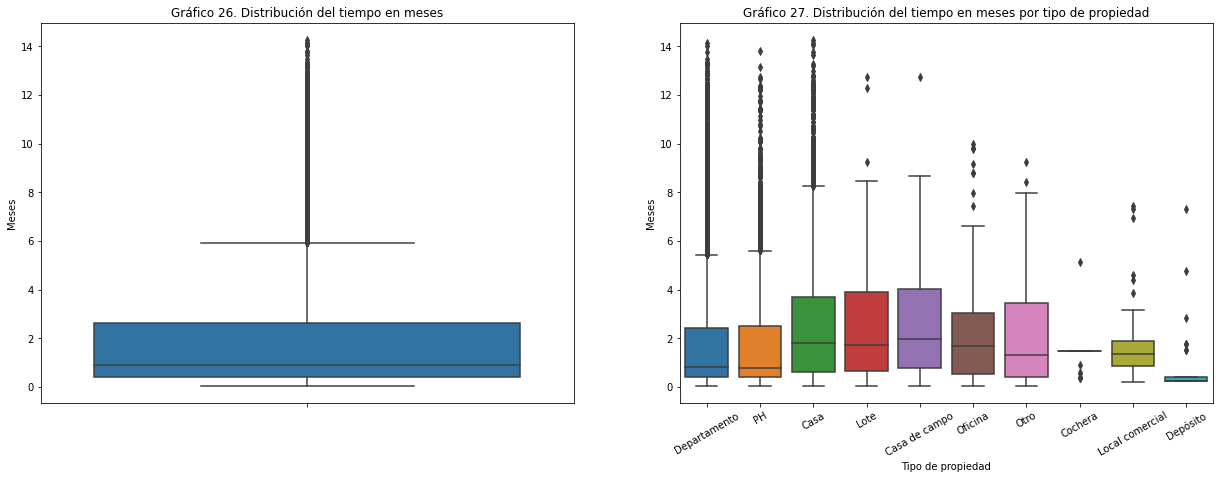

In [42]:
df_desafio2 = df_desafio[df_desafio.meses != 0].copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7))
sns.boxplot(data = df_desafio2, y = 'meses', ax = ax1)
ax1.set_ylabel('Meses')
ax1.set_title('Gráfico 26. Distribución del tiempo en meses')

sns.boxplot(data = df_desafio2, y = 'meses', x = 'property_type', ax = ax2)
ax2.set_xlabel('Tipo de propiedad')
ax2.set_ylabel('Meses')
ax2.set_title('Gráfico 27. Distribución del tiempo en meses por tipo de propiedad')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 30)

#plt.savefig('grafico_2728.png', bbox_inches='tight')
plt.show()

Bueno creo que en la realidad dependiendo de la propiedad va a ser más fácil o difícil vender, ya sea por cuestión de dinero, ubicación u otros factores. Aún así después de filtrar y quitar ese valor de 0, el promedio se mantiene en 1.73 meses.<br>

Validaremos si una propiedad que se vende mas barata, tiende a venderse más rapido.

In [43]:
per25 = df_desafio2['price'].quantile(0.25)
per25

115000.0

In [44]:
per75 = df_desafio2['price'].quantile(0.75)
per75

268000.0

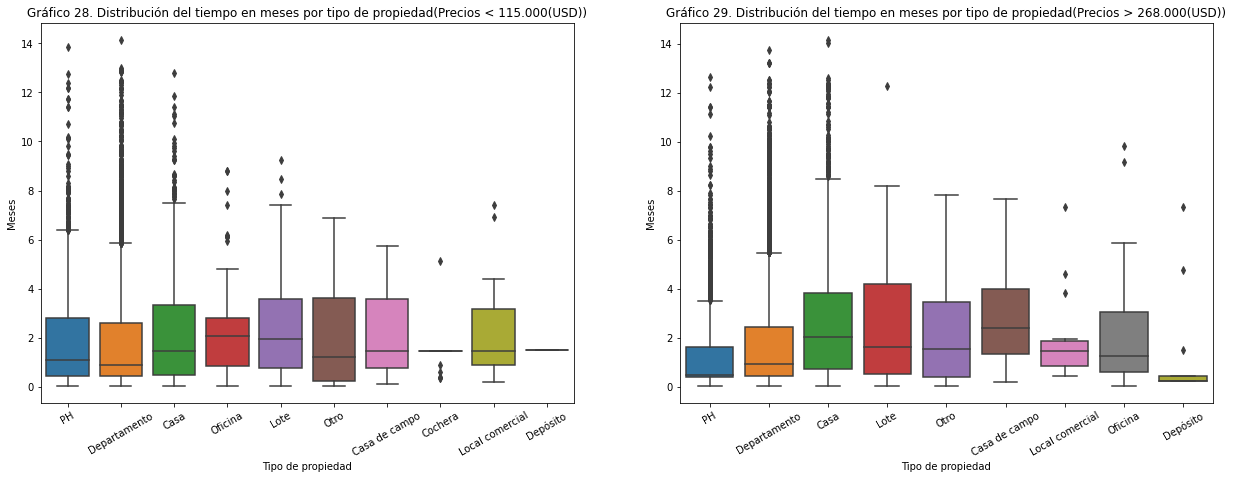

In [45]:
precio_bajo = df_desafio2[df_desafio2.price < per25]
precio_alto = df_desafio2[df_desafio2.price > per75]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7))

sns.boxplot(data = precio_bajo, y = 'meses', x = 'property_type', ax=ax1)
ax1.set_xlabel('Tipo de propiedad')
ax1.set_ylabel('Meses')
ax1.set_title('Gráfico 28. Distribución del tiempo en meses por tipo de propiedad(Precios < 115.000(USD))')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 30)

sns.boxplot(data = precio_alto, y = 'meses', x = 'property_type', ax=ax2)
ax2.set_xlabel('Tipo de propiedad')
ax2.set_ylabel('Meses')
ax2.set_title('Gráfico 29. Distribución del tiempo en meses por tipo de propiedad(Precios > 268.000(USD))')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 30)

#plt.savefig('grafico_2728.png', bbox_inches='tight')
plt.show()

En general, al graficar estos datos esperaba que la tendencia de precios bajos se mantuviera acorde con la media global y que con precios altos esta media fuese mayor, pero no fue así. Incluso si analizamos por tipo de propiedad podemos apreciar que los PH se venderán más rápido si son costosos, pero en términos generales la diferencia es poco apreciable por lo menos para los tipos de propiedad más publicados (PH, Departamento, Casa) en properati.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [46]:
#Selección de aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
data_ml = df[(df.l2 == 'Capital Federal') & (df.property_type.isin(['Departamento', 'Casa','PH']))].copy()

#Selección de aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
data_ml = data_ml[(data_ml['surface_total'] <= 1000) & (data_ml['surface_total'] >= 15)]

#Selecciona de aquellas propiedades cuya precio es menor 4000000 dólares.
data_ml = data_ml[(data_ml['price'] <= 4000000)]

#Selección de las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
data_final = data_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type']].copy()

#Dejo la columna property_type, para hacer una demostración en la parte final del notebook

#Descartar aquellas instacias con valores faltantes.
data_final = data_final.dropna(axis=0)
print(data_final.shape)
data_final.head()

(81019, 7)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [47]:
data_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rooms,81019.0,3.009652,1.308602,1.0,2.0,3.0,4.0,26.0
bedrooms,81019.0,2.002037,1.049673,0.0,1.0,2.0,3.0,15.0
bathrooms,81019.0,1.553821,0.852672,1.0,1.0,1.0,2.0,14.0
surface_total,81019.0,95.361779,77.253578,15.0,49.0,71.0,111.0,1000.0
surface_covered,81019.0,84.928535,156.133119,1.0,44.0,63.0,96.0,17220.0
price,81019.0,263772.525543,298949.856656,6000.0,125000.0,180000.0,280000.0,4000000.0


In [48]:
corr_final = data_final.corr()

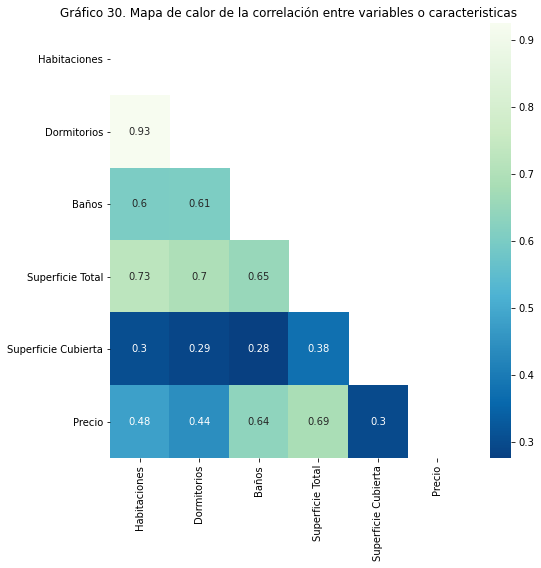

In [49]:
plt.figure(figsize=(8,8))
mask = np.zeros_like(corr_final)
mask[np.triu_indices_from(mask)] = True #aplicación de una mascara para no visualizar la diagonal hacia arriba
sns.heatmap(corr_final, annot=True, cmap="GnBu_r", mask=mask, xticklabels= xyticks,  yticklabels= xyticks)
plt.title("Gráfico 30. Mapa de calor de la correlación entre variables o caracteristicas")

#plt.savefig('grafico_29.png', bbox_inches='tight')
plt.show()

De acuerdo a los datos proporcionados para empezar a analizar los modelos de machine learning, podemos decir que si o si deberemos utilizar las variables Baños y Superficie Total para realizar las predicciones.

## Benchmark (Regresion Lineal - 1 Feature)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Se definira como modelo Benchmark el modelo de regresión lineal, teniendo en cuenta solo un componente o feature(en este caso el mas correlacionado con el precio).

In [51]:
X = data_final[['surface_total']]
y = data_final['price']

print(X.shape)
print(y.shape)

(81019, 1)
(81019,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

benchmark = LinearRegression()

benchmark.fit(X_train, y_train)

y_train_pred = benchmark.predict(X_train)
y_test_pred = benchmark.predict(X_test)

La métrica a escoger va a ser **$R^2$** para cuantificar el rendimiento del modelo. Esta metrica mide qué proporción de la variación en el resultado *y* puede explicarse por las covariables o predictores. Si $R^2$ está cerca de 1, significa que las covariables pueden explicar conjuntamente la variación en el resultado *y*. Esto significa que *y* puede predecirse con precisión (en cierto sentido) utilizando las covariables o predictores. Por el contrario, un $R^2$ que tiende a 0 significará que no se podra predicir con precisión.

$$ R^2 = 1 - \displaystyle \frac{\sigma^2}{Var(Y)}$$

Desafortunadamente, este estimador de $R^2$ está sesgado. La magnitud del sesgo dependerá de cuántas observaciones estén disponibles para ajustarse al modelo y cuántas covariables hay en relación con este tamaño de muestra. El sesgo puede ser particularmente grande con tamaños de muestra pequeños y un número moderado de covariables. ¿Qué podemos hacer? Bueno, se ha propuesto $R_{ajustado}^2$ el cual es una mejora agregada debido a una covariable adicional en su modelo. Por lo tanto, aumentará si agrega las covariables útiles y disminuirá si agrega predictores menos útiles. Sin embargo, $R^2$ aumenta con términos crecientes, aunque el modelo en realidad no está mejorando. 

$$ R_{adj}^2 = 1 - \displaystyle \big[\frac{(1 - R^2)(n - 1)}{n - k - 1}\big]$$

donde n es el número total de observaciones y k es el número de predictores. El $R_{ajustado}^2$ siempre será menor o igual que $R^2$. <br>
<br>
**Nota:** (el calculo de $R_{ajustado}^2$ lo realizaremos para observar y analizar si el numero de variables predictores y observaciones sesgan el calculo de $R^2$)

In [53]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('R2 datos de entrenamiento: ' + "{:.5f}".format(r2_train))
print('R2 datos de test:', "{:.5f}".format(r2_test))

R2 datos de entrenamiento: 0.46865
R2 datos de test: 0.47691


In [54]:
r2adj_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
r2adj_test = 1 - (1 - r2_test) * (len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

print('R2 ajustado datos Training: ' + "{:.5f}".format(r2adj_train))
print('R2 ajustado datos Test:', "{:.5f}".format(r2adj_test))

R2 ajustado datos Training: 0.46864
R2 ajustado datos Test: 0.47689


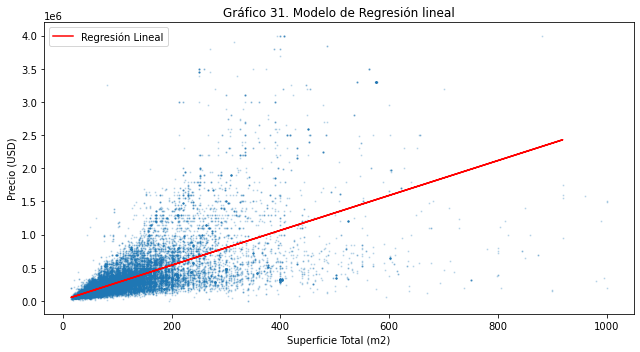

In [55]:
plt.figure(figsize = (9, 5))
plt.scatter(X_train, y_train, s = 1, alpha = 0.2)
plt.plot(X_test, y_test_pred,label ='Regresión Lineal', c = 'r')
plt.xlabel('Superficie Total (m2)')
plt.ylabel('Precio (USD)')
plt.title('Gráfico 31. Modelo de Regresión lineal')
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
print(benchmark.coef_, benchmark.intercept_)

[2630.4146957] 13037.407671383175


En el gráfico 31 se puede observar como la regresión lineal en el modelo y = mx + b, representa la relación entre Precio y superficie total.

$$ Precio(USD) =  2630.41(USD / m^2) * SupTotal(m^2) + 13037.4(USD) $$
$$R^2 = 0.4769, R_{adj}^2 = 0.4768$$

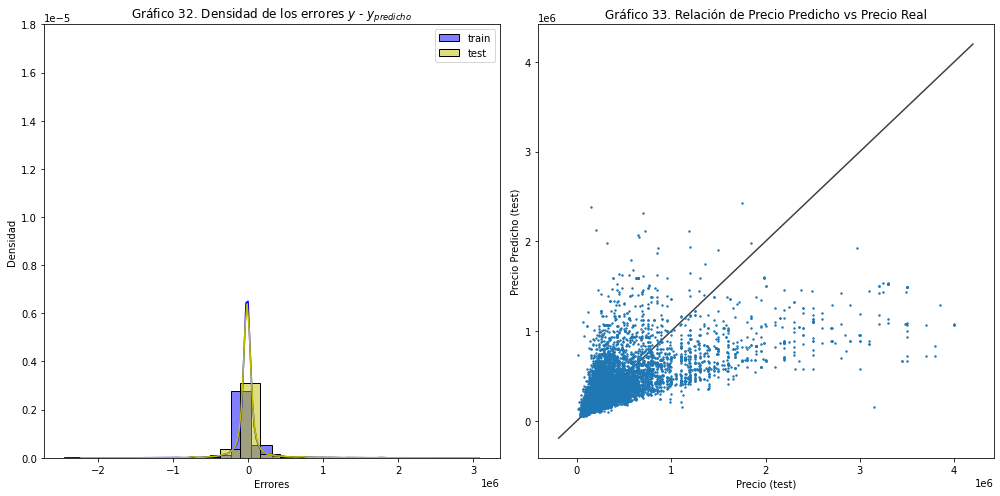

In [57]:
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', color = 'b', stat='density', kde=1)
sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', color = 'y', stat='density', kde=1)
plt.xlabel('Errores')
plt.ylabel('Densidad')
plt.ylim(0, 0.000018) #Observar en las graficas de densidad la misma escala para todos los modelos evaluados
plt.title('Gráfico 32. Densidad de los errores $y$ - $y_{predicho}$')
plt.legend()


ax = plt.subplot(1,2,2)

#logy_test = np.log10(y_test)
#logy_pred = np.log10(y_test_pred)

ax.scatter(y_test, y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('Precio (test)')
plt.ylabel('Precio Predicho (test)')
plt.title('Gráfico 33. Relación de Precio Predicho vs Precio Real')
    
plt.tight_layout()
plt.show()

Como se puede observar el modelo ajusta aproximadamente bien (R2 = 0.47689) cuando los precios con menos a 100.000 USD pero aún asi quedan muchos datos sin una correcta predicción. Además que la diferencia de (y - y_predicho) esta en un rango amplio ~ (-700.000 y 700.000)

In [58]:
from prettytable import PrettyTable #conda install -c conda-forge prettytable

In [59]:
def metrics_summarize(X, y, y_pred):
    """
    Tomará las covariables predictoras, el target real y predicho, para
    dar un resumen de metricas R2 y R2(ajustado).
    """
    r2 = r2_score(y, y_pred)
    n = len(y)
    k = X.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1)/(n - k - 1)
    
    return {'R2':r2, 'R2_adj':r2_adj}

In [60]:
conteo_graficas = 34
def build_model(regressor, X, y, show_plots = None, ts = 0.3):
    """
    Construirá el modelo, y devolverá las métricas correspondientes
    para analizarlo(R2 y R2(ajustado) para los set de datos del training
    y del test. Adicionalmente si lo desea grafica un diagrama
    de distribución(y_real vs y_pred) e histograma (Densidad de errores).
    
    ts: test_size
        Proporción a tomar de laa variables para el set de datos de testeo.
        por default = 0.3
    """
    global conteo_graficas
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = 42)
    
    regressor.fit(X_train, y_train)
    
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    train_summary = metrics_summarize(X_train, y_train,y_train_pred)
    test_summary = metrics_summarize(X_test, y_test,y_test_pred)
    
    #Grafica densidad de errores y diagrama de dispersión y_real vs y_predicha
    if show_plots == True:
        plt.figure(figsize = (21,7))
        
        #Imprime el gráfico de densidad de errores.
        
        plt.subplot(1,3,1)
        sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', color = 'b', stat='density', kde=1)
        sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', color = 'y', stat='density', kde=1)
        plt.xlabel('Errores')
        plt.ylabel('Densidad')
        plt.ylim(0, 0.000018) #Observar en las graficas de densidad la misma escala para todos los modelos evaluados
        plt.title(f'Gráfico {conteo_graficas}. Densidad de los errores ($y$ - $y_p$)')
        conteo_graficas += 1
        plt.legend()

        ax = plt.subplot(1,3,2)

        ax.scatter(y_test, y_test_pred, s = 1)
    
        lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]
    
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        plt.xlabel('Precio (test)')
        plt.ylabel('Precio Predicho (test)')
        plt.title(f'Gráfico {conteo_graficas}. Relación de Precio Predicho vs Precio Real')
        conteo_graficas += 1
        
        ax2 = plt.subplot(1,3,3)
        ax2.scatter(X_train['surface_total'], y_train, s = 1, alpha = 0.2)
        ax2.scatter(X_test['surface_total'], y_test_pred, label = regressor, c = 'r', s = 1, alpha = 0.1)
        plt.xlabel('Superficie Total (m2)')
        plt.ylabel('Precio (USD)')
        plt.title(f'Gráfico {conteo_graficas}. Precio vs Superficie \nModelo {regressor}')
        conteo_graficas += 1
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    return{'training':train_summary, 'test':test_summary}

In [61]:
def compare_resultados(diccionario, nombre_tabla):
    """
    Imprime el resumen de métricas de los modelos evaluados, guardados en un diccionario. 
    """
    table = PrettyTable(['Modelo', 'R2 (Training)', 'R2 (Test)', ' ','R2_adj (Training)', 'R2_adj (Test)'])
    
    for key in diccionario:
        rtrain_1 = diccionario[key]['training']['R2']
        rtrain_2 = diccionario[key]['training']['R2_adj']
        rtest_1 = diccionario[key]['test']['R2']
        rtest_2 = diccionario[key]['test']['R2_adj']
        table.add_row([key, '{:.5f}'.format(rtrain_1), '{:.5f}'.format(rtest_1), ' ','{:.5f}'.format(rtrain_2), '{:.5f}'.format(rtest_2)])      
        
    print(table.get_string(title=nombre_tabla))

In [62]:
resultado_dict = dict() #diccionario donde guardaremos los resultados de los modelos evaluados
resultado_dict['Modelo Benchmark - Regresión Lineal'] = build_model(benchmark, X, y)

In [63]:
compare_resultados(resultado_dict, "Resumen Métricas de los Modelos evaluados")

+---------------------------------------------------------------------------------------------------------+
|                                Resumen Métricas de los Modelos evaluados                                |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
|                Modelo               | R2 (Training) | R2 (Test) |   | R2_adj (Training) | R2_adj (Test) |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
| Modelo Benchmark - Regresión Lineal |    0.46865    |  0.47691  |   |      0.46864      |    0.47689    |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+


## Selección covariables predictoras

Para este caso iremos evaluando cada variable predictora para analizar su aporte para mejorar el $R^2$ y los modelos que utilizaremos. Empezaremos con las 2 características con más correlación a "Precio(price)" de acuerdo al mapa de calor de la gráfica 30 y continuaremos aumentandole una característica en orden descendente al valor de correlación.

In [64]:
#Primer Caso, variables predictoras -> surface_total y bathrooms
X_0 = data_final.drop(['rooms', 'bedrooms', 'surface_covered', 'price', 'property_type'], axis=1)
y_0 = data_final['price']

print(X_0.shape)
print(y_0.shape)

(81019, 2)
(81019,)


In [65]:
#n_neighbors = 5
regresor_vecinos = KNeighborsRegressor(n_neighbors = 5)
#max_depth = 5, random_state = 42
regresor_arbol = DecisionTreeRegressor(max_depth = 5, random_state = 42)

In [66]:
seleccion_variables = dict()
seleccion_variables['K-Neighbor - Caso 1'] = build_model(regresor_vecinos, X_0, y_0)

seleccion_variables['Decision Tree - Caso 1'] = build_model(regresor_arbol, X_0, y_0)

In [67]:
#Segundo Caso, variables predictoras -> surface_total, bathrooms y rooms
X_1 = data_final.drop(['bedrooms', 'surface_covered', 'price', 'property_type'], axis=1)
y_1 = data_final['price']

print(X_1.shape)
print(y_1.shape)

(81019, 3)
(81019,)


In [68]:
seleccion_variables['K-Neighbor - Caso 2'] = build_model(regresor_vecinos, X_1, y_1)

seleccion_variables['Decision Tree - Caso 2'] = build_model(regresor_arbol, X_1, y_1)

In [69]:
#Tercer Caso, variables predictoras -> surface_total, bathrooms, rooms y bedrooms
X_2 = data_final.drop(['surface_covered', 'price', 'property_type'], axis=1)
y_2 = data_final['price']

print(X_2.shape)
print(y_2.shape)

(81019, 4)
(81019,)


In [70]:
seleccion_variables['K-Neighbor - Caso 3'] = build_model(regresor_vecinos, X_2, y_2)

seleccion_variables['Decision Tree - Caso 3'] = build_model(regresor_arbol, X_2, y_2)

In [71]:
#Cuarto Caso, variables predictoras -> surface_total, bathrooms, rooms, bedrooms y surface_covered
X_3 = data_final.drop(['price', 'property_type'], axis=1)
y_3 = data_final['price']

print(X_3.shape)
print(y_3.shape)

(81019, 5)
(81019,)


In [72]:
seleccion_variables['K-Neighbor - Caso 4'] = build_model(regresor_vecinos, X_3, y_3)

seleccion_variables['Decision Tree - Caso 4'] = build_model(regresor_arbol, X_3, y_3)

compare_resultados(seleccion_variables, "Resumen Métricas para selección de variables predictoras")

+--------------------------------------------------------------------------------------------+
|                  Resumen Métricas para selección de variables predictoras                  |
+------------------------+---------------+-----------+---+-------------------+---------------+
|         Modelo         | R2 (Training) | R2 (Test) |   | R2_adj (Training) | R2_adj (Test) |
+------------------------+---------------+-----------+---+-------------------+---------------+
|  K-Neighbor - Caso 1   |    0.70408    |  0.63454  |   |      0.70407      |    0.63451    |
| Decision Tree - Caso 1 |    0.59976    |  0.59796  |   |      0.59975      |    0.59792    |
|  K-Neighbor - Caso 2   |    0.76794    |  0.67938  |   |      0.76793      |    0.67934    |
| Decision Tree - Caso 2 |    0.62305    |  0.61738  |   |      0.62303      |    0.61734    |
|  K-Neighbor - Caso 3   |    0.78002    |  0.68760  |   |      0.78000      |    0.68755    |
| Decision Tree - Caso 3 |    0.62733    |  0.6184

Como se puede observar en la anterior tabla el caso 3 fue donde la variable predictora tuvo menos impacto obtuvo para incrementar el valor de $R^2$ por lo cual la covariable adicionada(bedrooms) en este caso no se tendra en cuenta para ajustar los hiperparametros de cada modelo.<br>

A partir de aquí llamaremos el caso de partida donde las covariables predictoras corresponden a: surface_total, bathrooms, rooms y surface_covered

In [73]:
#Caso Partida, variables predictoras -> surface_total, bathrooms, rooms y surface_covered
X = data_final.drop(['bedrooms', 'price', 'property_type'], axis=1)
y = data_final['price']

print(X.shape)
print(y.shape)

(81019, 4)
(81019,)


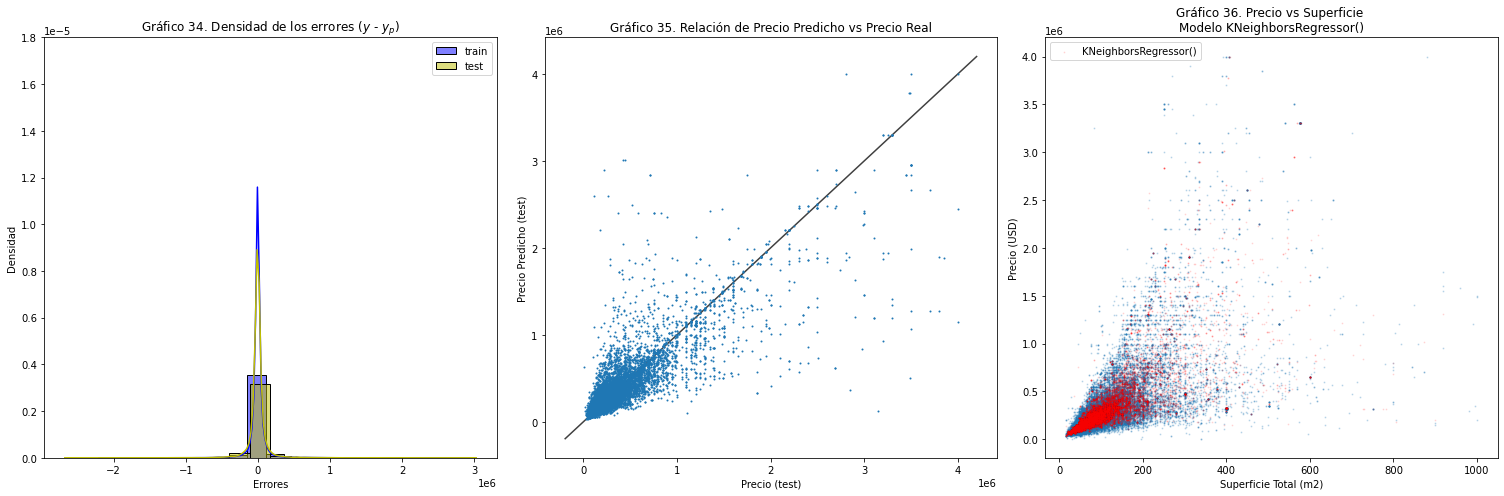

In [74]:
resultado_dict['K-Neighbor - Caso Partida'] = build_model(regresor_vecinos, X, y, show_plots = True)

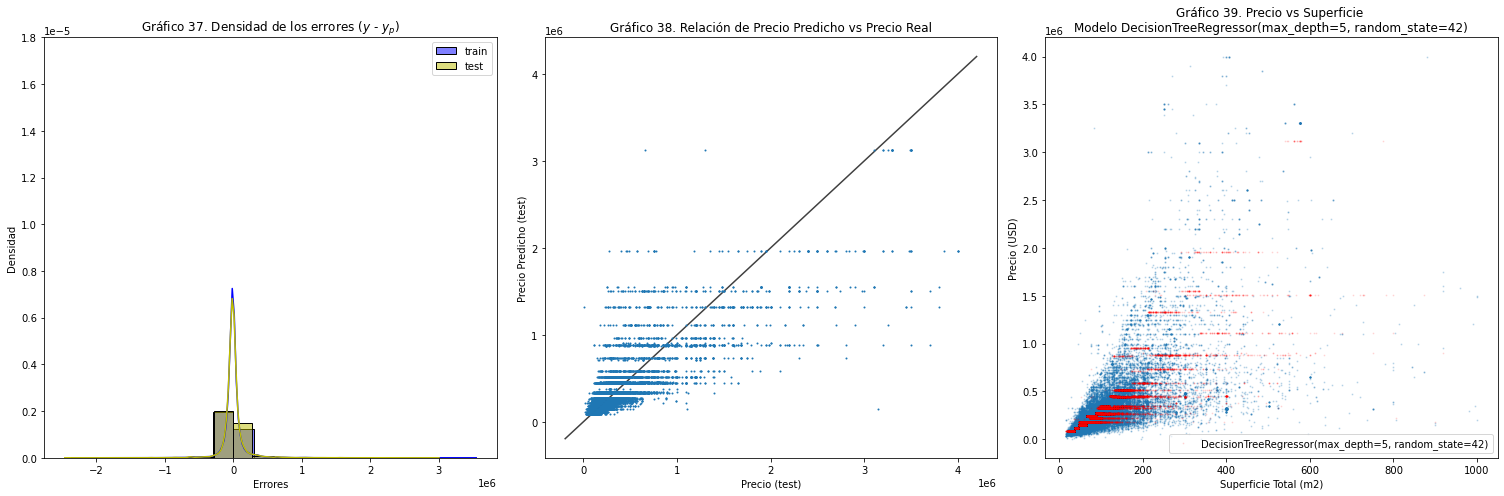

In [75]:
resultado_dict['Decision Tree - Caso Partida'] = build_model(regresor_arbol, X, y, show_plots = True)

Si observamos las gráficas 34 y 37 en terminos de densidad el error se concentra o tienede a 0 más en el modelo de vecinos más próximos, que es algo que se espera si observamos que en las gráficas 35 y 38; vecinos más próximos ajusta bien los datos de test y con arbol de decisión se pueden ver las decisiones sesgadas y no se ajustan bien los datos del test debido a que el árbol no es tan profundo. Las gráficas 36 y 39 nos permiten ver más o menos que zonas pueden predecir nuestros modelos.

In [76]:
compare_resultados(resultado_dict, "Resumen Métricas de los Modelos evaluados")

+---------------------------------------------------------------------------------------------------------+
|                                Resumen Métricas de los Modelos evaluados                                |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
|                Modelo               | R2 (Training) | R2 (Test) |   | R2_adj (Training) | R2_adj (Test) |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
| Modelo Benchmark - Regresión Lineal |    0.46865    |  0.47691  |   |      0.46864      |    0.47689    |
|      K-Neighbor - Caso Partida      |    0.83219    |  0.73422  |   |      0.83218      |    0.73417    |
|     Decision Tree - Caso Partida    |    0.67670    |  0.67684  |   |      0.67667      |    0.67679    |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+


## Escribir una descripción.

## CURVA DE VALIDACIÓN VECINO MÁS CERCANO

Validaremos el hiperparámetro de cuantos vecinos es el más efectivo para este proyecto en términos de la métrica.

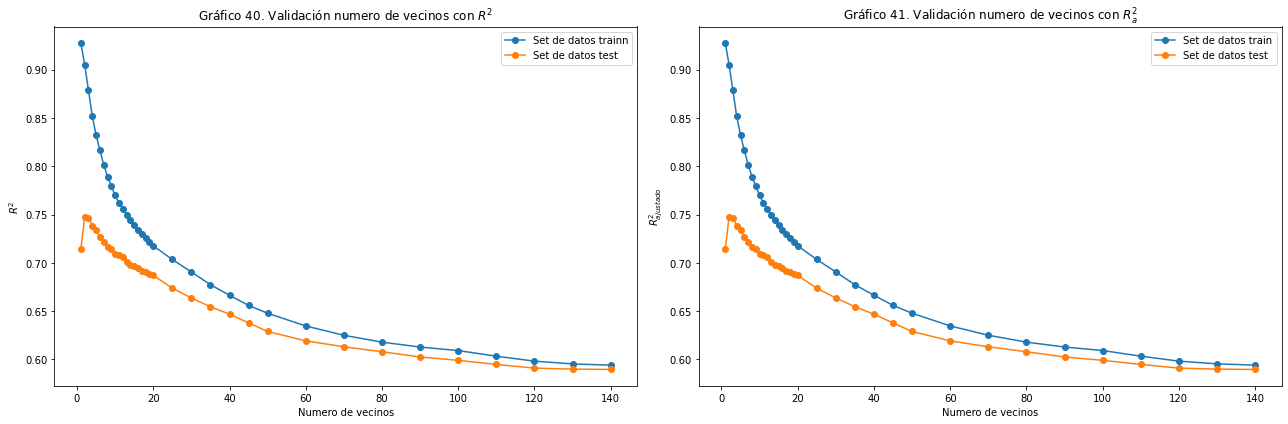

In [77]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_r2_train = []
lista_r2_test = []
lista_r2adj_train = []
lista_r2adj_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = list(range(1, 20)) + list(range(20, 50, 5)) + list(range(50, 150, 10))

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    validacion_k = build_model(clf, X, y)
    
    # Agregar la información a las listas
    lista_r2_train.append(validacion_k['training']['R2'])
    lista_r2_test.append(validacion_k['test']['R2'])
    lista_r2adj_train.append(validacion_k['training']['R2_adj'])
    lista_r2adj_test.append(validacion_k['test']['R2_adj'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(k_vecinos, lista_r2_train,'o-',label='Set de datos trainn' )
ax1.plot(k_vecinos, lista_r2_test, 'o-',label='Set de datos test')
ax1.legend()
ax1.set_xlabel("Numero de vecinos")
ax1.set_ylabel("$R^2$")
ax1.set_title(f'Gráfico {conteo_graficas}. Validación numero de vecinos con $R^2$')
conteo_graficas += 1

ax2.plot(k_vecinos, lista_r2adj_train,'o-',label='Set de datos train')
ax2.plot(k_vecinos, lista_r2adj_test, 'o-',label='Set de datos test')
ax2.legend()
ax2.set_xlabel("Numero de vecinos")
ax2.set_ylabel("$R_{ajustado}^2$")
ax2.set_title(f'Gráfico {conteo_graficas}. Validación numero de vecinos con $R_a^2$')
conteo_graficas += 1

plt.tight_layout()
plt.show()

De las gráficas se puede intuir que nuestro punto optimo esta entre k = 1 y k = 5, en donde podemos observar el máximo $R^2$ de los datos del test. Por tanto para verlos mejor lo tabularemos y de alli tomaremos una decisión.

In [78]:
def vecino_optimo(vec_dict):
    R_max = 0
    k_opt = None
    for key in vec_dict:
        if vec_dict[key]['test']['R2'] > R_max:
            R_max = vec_dict[key]['test']['R2']
            k_opt = key
    print(f'Número de vecinos optimo: {k_opt} con un R2: {R_max}')       

In [79]:
validacion_vecinos = dict()
for k in range(1, 6):
    clf = KNeighborsRegressor(n_neighbors= k)
    
    validacion_vecinos[f'k = {k}'] = build_model(clf, X, y)

compare_resultados(validacion_vecinos, 'Resumen Métricas del modelo KNeighbors para diferentes vecinos')

+----------------------------------------------------------------------------+
|       Resumen Métricas del modelo KNeighbors para diferentes vecinos       |
+--------+---------------+-----------+---+-------------------+---------------+
| Modelo | R2 (Training) | R2 (Test) |   | R2_adj (Training) | R2_adj (Test) |
+--------+---------------+-----------+---+-------------------+---------------+
| k = 1  |    0.92781    |  0.71383  |   |      0.92780      |    0.71378    |
| k = 2  |    0.90524    |  0.74791  |   |      0.90524      |    0.74787    |
| k = 3  |    0.87852    |  0.74658  |   |      0.87851      |    0.74654    |
| k = 4  |    0.85179    |  0.73859  |   |      0.85177      |    0.73854    |
| k = 5  |    0.83219    |  0.73422  |   |      0.83218      |    0.73417    |
+--------+---------------+-----------+---+-------------------+---------------+


In [80]:
vecino_optimo(validacion_vecinos)

Número de vecinos optimo: k = 2 con un R2: 0.7479148343643562


Podemos observar en la tabla como a medida que el número de vecinos aumenta el $R^2$ de los datos de training disminuye, similar comportamiento se observa con los datos de test excepto cuando k = 2 en donde el $R^2$ muestra el máximo. Por tal motivo el número de vecinos óptimo para el $R^2$ del set de datos de training y test es 2 vecinos.

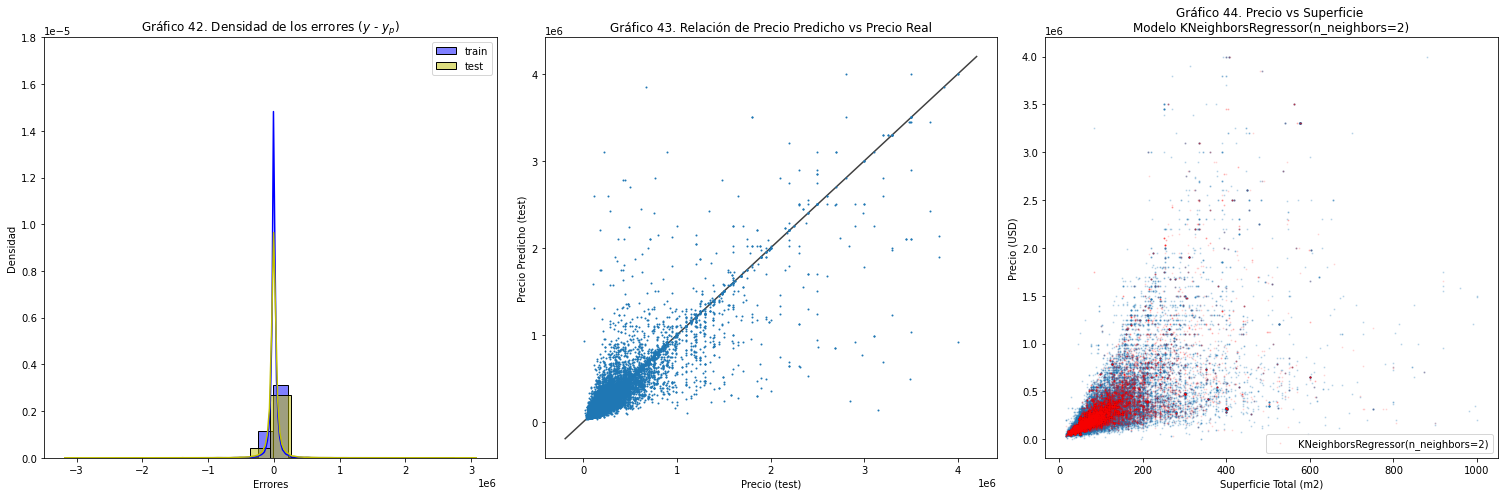

In [81]:
vecinos_optimo = KNeighborsRegressor(n_neighbors= 2)

resultado_dict['K-Neighbor - n-neighbors = 2'] = build_model(vecinos_optimo, X, y, show_plots = True)

In [82]:
compare_resultados(resultado_dict, "Resumen Métricas de los Modelos evaluados")

+---------------------------------------------------------------------------------------------------------+
|                                Resumen Métricas de los Modelos evaluados                                |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
|                Modelo               | R2 (Training) | R2 (Test) |   | R2_adj (Training) | R2_adj (Test) |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
| Modelo Benchmark - Regresión Lineal |    0.46865    |  0.47691  |   |      0.46864      |    0.47689    |
|      K-Neighbor - Caso Partida      |    0.83219    |  0.73422  |   |      0.83218      |    0.73417    |
|     Decision Tree - Caso Partida    |    0.67670    |  0.67684  |   |      0.67667      |    0.67679    |
|     K-Neighbor - n-neighbors = 2    |    0.90524    |  0.74791  |   |      0.90524      |    0.74787    |
+---------------------------

Además de que el numero de vecinos puede considerarse pequeño puede que estemos sobreajustando a los datos train con solo 2 observaciones, por lo cual una mejora posible al modelo de KNN es cambiarle el hiperparámetro 'weigths' el cual permite asignar un peso a los vecinos cercanos que por defecto esta en 'uniform' y como su nombre indica asigna pesos uniformemente a cada vecino. En la siguiente demostración veremos que sucede al asignarle 'distance' el cual asigna un peso debido a la distancia con el vecino, cuanto más cerca un vecino el peso será mayor. Y que aumente el numero de vecinos para realizar la regresión.

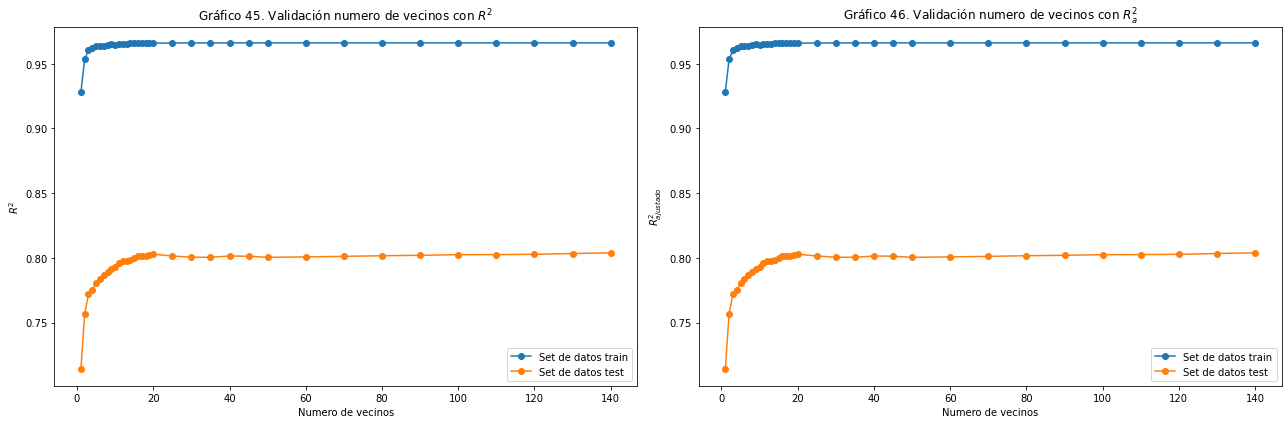

In [83]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_r2_train = []
lista_r2_test = []
lista_r2adj_train = []
lista_r2adj_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = list(range(1, 20)) + list(range(20, 50, 5)) + list(range(50, 150, 10))

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    # Definir el modelo con el valor de vecinos deseado y cambio de como evaluar los pesos.
    clf = KNeighborsRegressor(n_neighbors= k, weights = 'distance')
    
    # Entrenar el modelo
    validacion_k = build_model(clf, X, y)
    
    # Agregar la información a las listas
    lista_r2_train.append(validacion_k['training']['R2'])
    lista_r2_test.append(validacion_k['test']['R2'])
    lista_r2adj_train.append(validacion_k['training']['R2_adj'])
    lista_r2adj_test.append(validacion_k['test']['R2_adj'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(k_vecinos, lista_r2_train,'o-',label='Set de datos train' )
ax1.plot(k_vecinos, lista_r2_test, 'o-',label='Set de datos test')
ax1.legend()
ax1.set_xlabel("Numero de vecinos")
ax1.set_ylabel("$R^2$")
ax1.set_title(f'Gráfico {conteo_graficas}. Validación numero de vecinos con $R^2$')
conteo_graficas += 1

ax2.plot(k_vecinos, lista_r2adj_train,'o-',label='Set de datos train')
ax2.plot(k_vecinos, lista_r2adj_test, 'o-',label='Set de datos test')
ax2.legend()
ax2.set_xlabel("Numero de vecinos")
ax2.set_ylabel("$R_{ajustado}^2$")
ax2.set_title(f'Gráfico {conteo_graficas}. Validación numero de vecinos con $R_a^2$')
conteo_graficas += 1

plt.tight_layout()
plt.show()

De las gráficas 45 y 46 es dificil apreciar donde podemos observar un R2 optimo, el cual puede estar entre k = 15 y k = 24.

In [84]:
validacion_vecinos2 = dict()
for k in range(15, 26):
    clf = KNeighborsRegressor(n_neighbors= k, weights = 'distance')
    
    validacion_vecinos2[f'k = {k}'] = build_model(clf, X, y)

compare_resultados(validacion_vecinos2, 'Resumen Métricas del modelo KNeighbors para diferentes vecinos (weights = distance)')

+-------------------------------------------------------------------------------------------+
|    Resumen Métricas del modelo KNeighbors para diferentes vecinos (weights = distance)    |
+----------+------------------+-------------+----+-----------------------+------------------+
|  Modelo  |  R2 (Training)   |  R2 (Test)  |    |   R2_adj (Training)   |  R2_adj (Test)   |
+----------+------------------+-------------+----+-----------------------+------------------+
|  k = 15  |     0.96576      |   0.80001   |    |        0.96575        |     0.79998      |
|  k = 16  |     0.96581      |   0.80146   |    |        0.96581        |     0.80142      |
|  k = 17  |     0.96584      |   0.80137   |    |        0.96584        |     0.80134      |
|  k = 18  |     0.96589      |   0.80156   |    |        0.96589        |     0.80153      |
|  k = 19  |     0.96590      |   0.80243   |    |        0.96590        |     0.80240      |
|  k = 20  |     0.96591      |   0.80288   |    |        0.

In [85]:
vecino_optimo(validacion_vecinos2)

Número de vecinos optimo: k = 20 con un R2: 0.8028839201942661


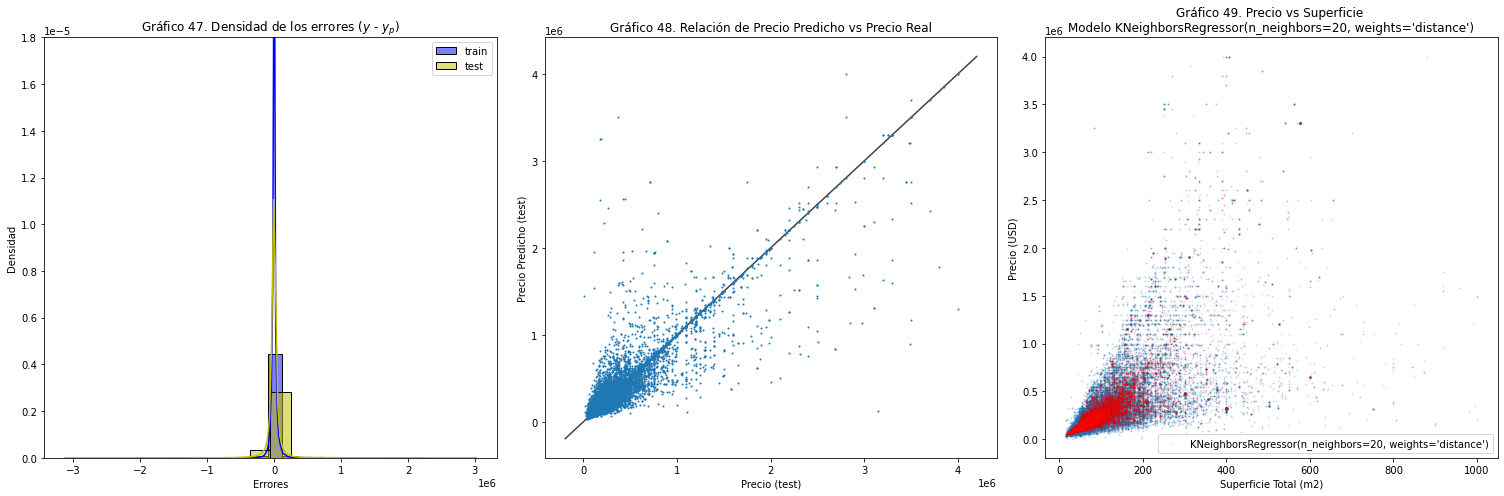

In [86]:
vecinos_prueba = KNeighborsRegressor(n_neighbors = 20, weights = 'distance')

resultado_dict['K-Neighbor(k=20) - Weight(distance)'] = build_model(vecinos_prueba, X, y, show_plots = True)

Visualmente quizas sea dificil encontrar una diferencia apreciable, pero si colocamos las gráficas 43 y 48 una al lado de la otra podremos encontrar que cuando el precio(test) > 100.000 los puntos se concentran un poco más en la gráfica 48.

In [87]:
compare_resultados(resultado_dict, "Resumen Métricas de los Modelos evaluados")

+---------------------------------------------------------------------------------------------------------+
|                                Resumen Métricas de los Modelos evaluados                                |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
|                Modelo               | R2 (Training) | R2 (Test) |   | R2_adj (Training) | R2_adj (Test) |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
| Modelo Benchmark - Regresión Lineal |    0.46865    |  0.47691  |   |      0.46864      |    0.47689    |
|      K-Neighbor - Caso Partida      |    0.83219    |  0.73422  |   |      0.83218      |    0.73417    |
|     Decision Tree - Caso Partida    |    0.67670    |  0.67684  |   |      0.67667      |    0.67679    |
|     K-Neighbor - n-neighbors = 2    |    0.90524    |  0.74791  |   |      0.90524      |    0.74787    |
| K-Neighbor(k=20) - Weight(

La modificación del parámetro ´weights´ a *distance* nos permite mejorar el desempeño del modelo.

## CURVA DE VALIDACIÓN ÁRBOL DE DECISIÓN

Validaremos el hiperparámetro de cuan profundo evaluará el árbol y es lo mas efectivo para este proyecto en terminos de $R^2$.

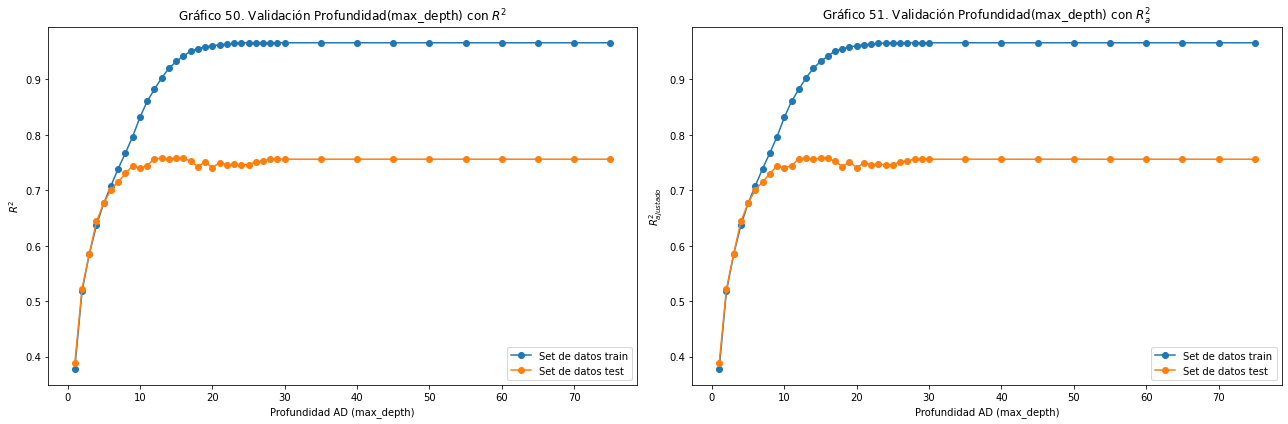

In [88]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_r2_train = []
lista_r2_test = []
lista_r2adj_train = []
lista_r2adj_test = []

# Definimos la lista de valores de k que vamos a explorar
max_deeps = list(range(1, 30)) + list(range(30, 80, 5))

# Generamos un loop sobre los distintos valores de k 
for max_deep in max_deeps:
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeRegressor(max_depth = max_deep, random_state=42)
    
    # Entrenar el modelo
    validacion_depth = build_model(clf, X, y)
    
    # Agregar la información a las listas
    lista_r2_train.append(validacion_depth['training']['R2'])
    lista_r2_test.append(validacion_depth['test']['R2'])
    lista_r2adj_train.append(validacion_depth['training']['R2_adj'])
    lista_r2adj_test.append(validacion_depth['test']['R2_adj'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(max_deeps, lista_r2_train,'o-',label='Set de datos train' )
ax1.plot(max_deeps, lista_r2_test, 'o-',label='Set de datos test')
ax1.legend()
ax1.set_xlabel("Profundidad AD (max_depth)")
ax1.set_ylabel("$R^2$")
ax1.set_title(f'Gráfico {conteo_graficas}. Validación Profundidad(max_depth) con $R^2$')
conteo_graficas += 1

ax2.plot(max_deeps, lista_r2adj_train,'o-',label='Set de datos train' )
ax2.plot(max_deeps, lista_r2adj_test, 'o-',label='Set de datos test')
ax2.legend()
ax2.set_xlabel("Profundidad AD (max_depth)")
ax2.set_ylabel("$R_{ajustado}^2$")
ax2.set_title(f'Gráfico {conteo_graficas}. Validación Profundidad(max_depth) con $R_a^2$')
conteo_graficas += 1

plt.tight_layout()
plt.show()

De acuerdo a las graficas 50 y 51, no se puede observar un R2 máximo claro para el set de datos train, ya que se puede encontrar entre max_depth=10 y max_depth=30. Para confirmar que valor es optimo lo tabuleremos y decidiremos.

In [89]:
def depth_optimo(arbol_dict):
    R_max = 0
    depth_opt = None
    for key in arbol_dict:
        if arbol_dict[key]['test']['R2'] > R_max:
            R_max = arbol_dict[key]['test']['R2']
            depth_opt = key
    print(f'Profundidad optima: {depth_opt} con un R2: {R_max}') 

In [90]:
validacion_depth = dict()
for md in range(10, 31):
    clf = DecisionTreeRegressor(max_depth = md, random_state=42)
    
    validacion_depth[f'max_depth = {md}'] = build_model(clf, X, y)

compare_resultados(validacion_depth, "Resumen Métricas del Modelo DecisionTree para diferentes max_depth(profundidad)")

+------------------------------------------------------------------------------------------+
|     Resumen Métricas del Modelo DecisionTree para diferentes max_depth(profundidad)      |
+-----------------+----------------+------------+----+--------------------+----------------+
|      Modelo     | R2 (Training)  | R2 (Test)  |    | R2_adj (Training)  | R2_adj (Test)  |
+-----------------+----------------+------------+----+--------------------+----------------+
|  max_depth = 10 |    0.83151     |  0.73986   |    |      0.83150       |    0.73982     |
|  max_depth = 11 |    0.86064     |  0.74451   |    |      0.86063       |    0.74447     |
|  max_depth = 12 |    0.88206     |  0.75699   |    |      0.88206       |    0.75695     |
|  max_depth = 13 |    0.90289     |  0.75767   |    |      0.90288       |    0.75763     |
|  max_depth = 14 |    0.91979     |  0.75647   |    |      0.91979       |    0.75643     |
|  max_depth = 15 |    0.93242     |  0.75794   |    |      0.93242   

In [91]:
depth_optimo(validacion_depth)

Profundidad optima: max_depth = 15 con un R2: 0.7579373554263903


La profundidad (max_depth) a escoger como optima es 15, en donde el $R^2$ del set de test toma su máximo valor (0.75794).<br>
Quizas se observe que ha medida que incrementemos max_depth, incrementa el $R^2$ del set de training hasta que tiende a (0.96616). Pero con el set de test el $R^2$ varia hasta tender a (0.75615).<br>
Como nuestro objetivo es predecir nuevos datos, escogimos max_depth = 15 por que es el punto donde nos acercamos más a predecir los datos de test.

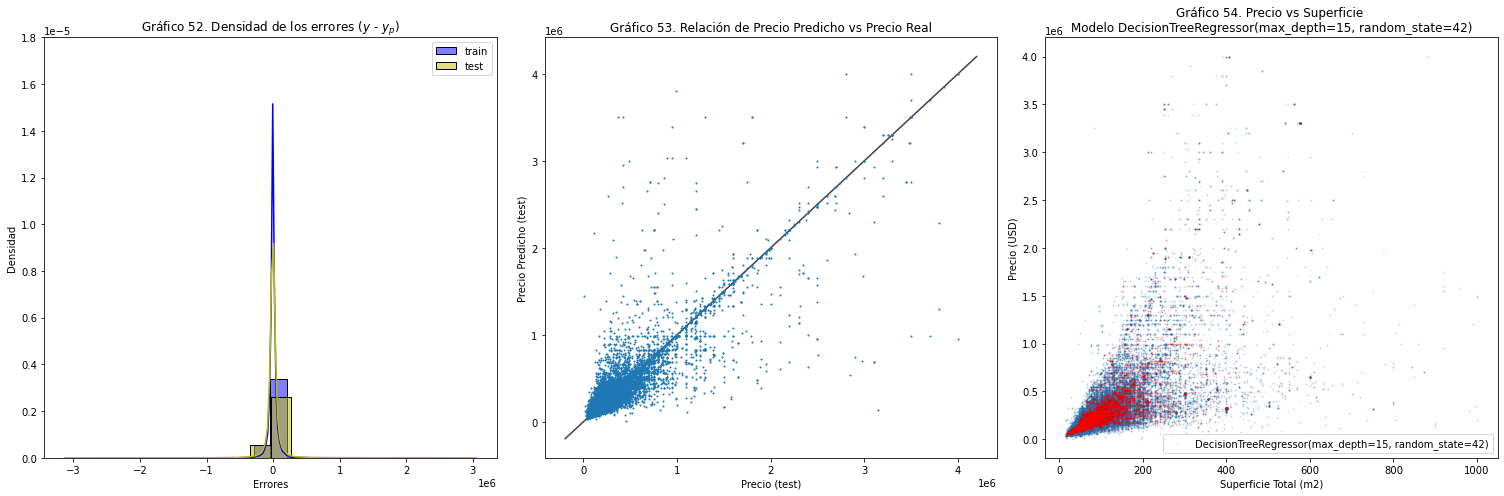

In [92]:
arbol_optimo = DecisionTreeRegressor(max_depth = 15, random_state=42)

resultado_dict['Decision Tree - max_depth = 15'] = build_model(arbol_optimo, X, y, show_plots = True)

A diferencia de nuestro caso de partida para el arbol de decisión en las gráficas 53 y 54, no se observa las decisiones tan sesgadas.

In [93]:
compare_resultados(resultado_dict, "Resumen Métricas de los Modelos evaluados")

+---------------------------------------------------------------------------------------------------------+
|                                Resumen Métricas de los Modelos evaluados                                |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
|                Modelo               | R2 (Training) | R2 (Test) |   | R2_adj (Training) | R2_adj (Test) |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
| Modelo Benchmark - Regresión Lineal |    0.46865    |  0.47691  |   |      0.46864      |    0.47689    |
|      K-Neighbor - Caso Partida      |    0.83219    |  0.73422  |   |      0.83218      |    0.73417    |
|     Decision Tree - Caso Partida    |    0.67670    |  0.67684  |   |      0.67667      |    0.67679    |
|     K-Neighbor - n-neighbors = 2    |    0.90524    |  0.74791  |   |      0.90524      |    0.74787    |
| K-Neighbor(k=20) - Weight(

## Escribir una descripción.

### ¿Cual es el mejor modelo?

De acuerdo a los modelos evaluados con sus parámetros ajustados, y basandonos en la métrica escogida $R^2$ el modelo que mejor ajustaría o predeciría el precio de nuevas propiedades (del tipo: Departamento, Casa, PH) es: **K-vecinos más próximos**. Si lo vemos en terminos de porcentaje con vecinos más próximos(K-Nearest Neighbor) tenemos una probabilidad de $80.288 \%$ de acertar en nuestra predicción, y con arboles de decisión obtenemos $75.794 \%$.<br>
El modelo que mejor se ajusta a nuestros datos es **K-vecinos más próximos(K-Nearest Neighbor)** ya que predice mejor los datos a futuro.

Para realizar el anterior ajuste no se tuvieron en cuenta la información referente a tipo de propiedad, la region y barrio donde se ubicaba la propiedad. Estos datos pudieron ser relevantes para predecir el precio, ya que la ubicación de una propiedad en un barrio o region barata o costosa podria hacer un mejor acercamiento al costo de una propiedad, ademas dependiendo del tipo de propiedad el precio puede variar de sector en sector. Quizas un buen ejercicio es adicionar estas columnas y parametrizarlas para ajustarlas a los modelos que evaluamos anteriormente.<br>
<br>
A continuación para visualizar como afecta la adición de la columna property_type y si realmente mejora le predicción de precio.

In [94]:
desafio_lf = pd.get_dummies(data_final, columns = ['property_type'])
desafio_lf.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,7.0,7.0,2.0,140.0,140.0,153000.0,0,1,0
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1


In [95]:
X_lf = desafio_lf.drop(['bedrooms', 'price'], axis=1)
y_lf = desafio_lf['price']

print(X_lf.shape)
print(y_lf.shape)

(81019, 7)
(81019,)


In [96]:
vecinos_prueba = KNeighborsRegressor(n_neighbors = 20, weights = 'distance')
arbol_optimo = DecisionTreeRegressor(max_depth = 15, random_state=42)

resultado_dict['K-Neighbor - Desafio(k=20)'] = build_model(vecinos_prueba, X_lf, y_lf)

resultado_dict['Decision Tree - Desafio(md=15)'] = build_model(arbol_optimo, X_lf, y_lf)

compare_resultados(resultado_dict, "Resumen Métricas de los Modelos evaluados")

+---------------------------------------------------------------------------------------------------------+
|                                Resumen Métricas de los Modelos evaluados                                |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
|                Modelo               | R2 (Training) | R2 (Test) |   | R2_adj (Training) | R2_adj (Test) |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
| Modelo Benchmark - Regresión Lineal |    0.46865    |  0.47691  |   |      0.46864      |    0.47689    |
|      K-Neighbor - Caso Partida      |    0.83219    |  0.73422  |   |      0.83218      |    0.73417    |
|     Decision Tree - Caso Partida    |    0.67670    |  0.67684  |   |      0.67667      |    0.67679    |
|     K-Neighbor - n-neighbors = 2    |    0.90524    |  0.74791  |   |      0.90524      |    0.74787    |
| K-Neighbor(k=20) - Weight(

Se puede observar que ambos modelos mejoraron el $R^2$, pero debemos reajustar los parámetros de cada modelo para poder concluir. Para realizarlo rapidamente utilizaremos GridSearchCV el cual nos implemente un modelo y evalua rapidamente los parámetros que quisieramos optimizar.

In [97]:
validacion_vecinos2 = dict()
for k in range(10, 201):
    clf = KNeighborsRegressor(n_neighbors= k, weights = 'distance')
    
    validacion_vecinos2[f'k = {k}'] = build_model(clf, X_lf, y_lf)

vecino_optimo(validacion_vecinos2)

Número de vecinos optimo: k = 168 con un R2: 0.8198722230499577


In [98]:
validacion_depth = dict()
for md in range(10, 201):
    clf = DecisionTreeRegressor(max_depth = md, random_state=42)
    
    validacion_depth[f'max_depth = {md}'] = build_model(clf, X_lf, y_lf)

depth_optimo(validacion_depth)

Profundidad optima: max_depth = 18 con un R2: 0.8257938774493816


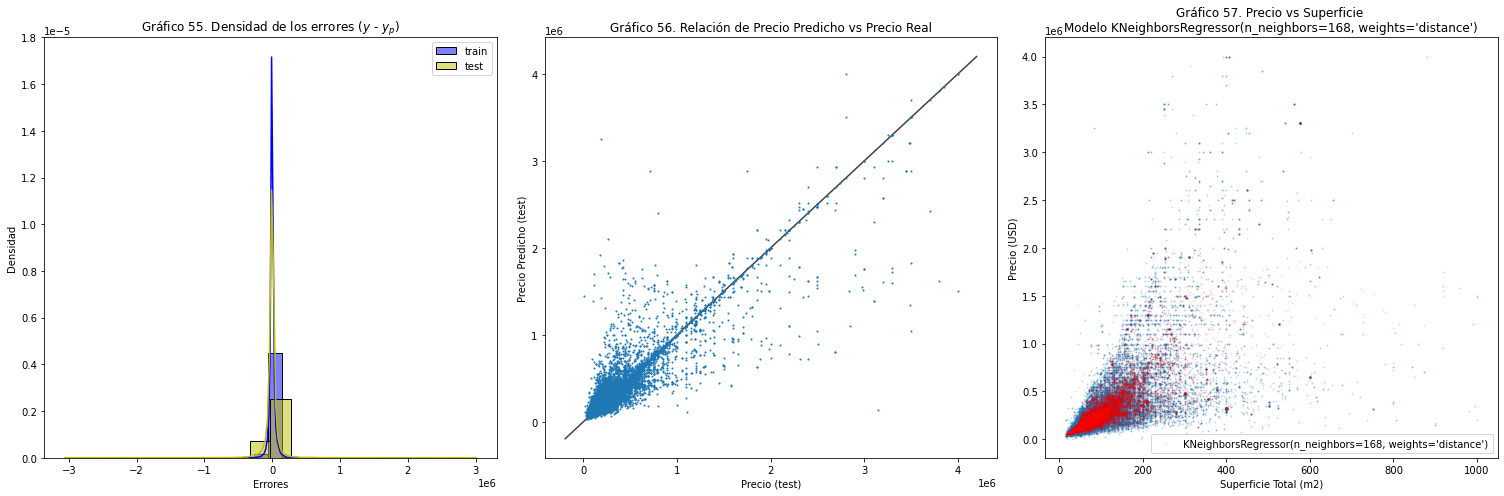

In [99]:
vecinos_desafio = KNeighborsRegressor(n_neighbors= 168, weights = 'distance')

resultado_dict['K-Neighbor - Desafio.(k=168)'] = build_model(vecinos_desafio, X_lf, y_lf, show_plots = True)

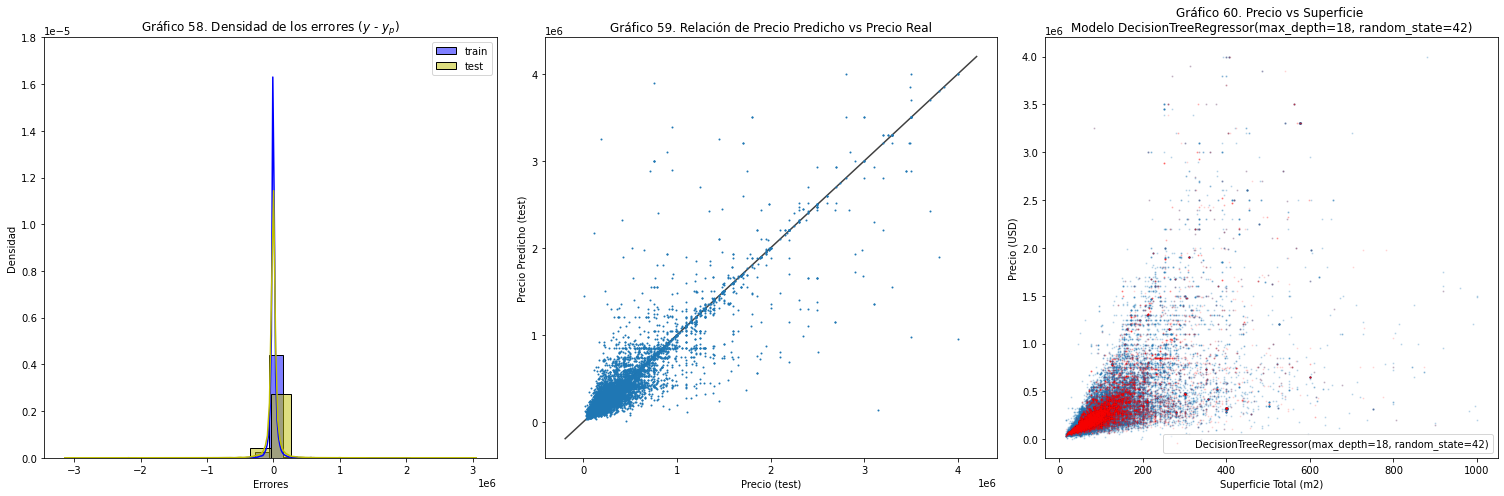

In [100]:
arbol_desafio = DecisionTreeRegressor(max_depth = 18, random_state=42)

resultado_dict['Decision Tree - Desafio.(md=18)'] = build_model(arbol_desafio, X_lf, y_lf, show_plots = True)

Ver graficamente para este caso si uno de los modelos es mejor que otro, nos quedaría muy dificil evaluarlo ya que ambos modelos aproximademente están prediciendo los precios con ~82% de ajuste a los datos de testeo, la diferencia la podremos observar en la siguiente tabla.

In [101]:
compare_resultados(resultado_dict, "Resumen Métricas de los Modelos evaluados")

+---------------------------------------------------------------------------------------------------------+
|                                Resumen Métricas de los Modelos evaluados                                |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
|                Modelo               | R2 (Training) | R2 (Test) |   | R2_adj (Training) | R2_adj (Test) |
+-------------------------------------+---------------+-----------+---+-------------------+---------------+
| Modelo Benchmark - Regresión Lineal |    0.46865    |  0.47691  |   |      0.46864      |    0.47689    |
|      K-Neighbor - Caso Partida      |    0.83219    |  0.73422  |   |      0.83218      |    0.73417    |
|     Decision Tree - Caso Partida    |    0.67670    |  0.67684  |   |      0.67667      |    0.67679    |
|     K-Neighbor - n-neighbors = 2    |    0.90524    |  0.74791  |   |      0.90524      |    0.74787    |
| K-Neighbor(k=20) - Weight(

Cabe resaltar que la adición de features puede incrementar la probabilidad de predecir el Precio y por lo tanto el desempeño de los modelos de Machine Learning, para este caso el mejor modelo resulto ser **árbol de decisión(Decision Tree)** ya que predice mejor el Precio con $R^2 = 0.82579$ y que ademas en terminos de complejidad el arbol no tuvo que modificar demasiado el parámetro max_depth para llegar a un mejor valor de $R^2$. Y por el otro lado Vecinos más próximos(K-Nearest Neighbors) paso de n_neighbors = 20 a =168 y claramente esta ultimá requiere un costo computacional alto, con $R^2 = 0.81987$.<br>